# MNIST digit classification with a fully connected network (fcNN)


**Goal:** In this notebook you will see how to use a fully connected networks (fcNN) in a classification task for images.

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. 

**Dataset:** You work with the MNIST dataset. We have 60'000 28x28 pixel greyscale images of digits and want to classify them into the right label (0-9).

**Content:**
* load the MNIST data 
* transform the labels into the one hot encoding
* visualize samples of the data
* flatten the 2D images into a 1D vector
* use keras to train a fcNN and look at the perfomance on new unseen test data
* use different activation functions and more hidden layers

| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_02/nb_ch02_02a.ipynb)



#### Install correct TF version (colab only)

#### Imports

In the next two cells, we load all the required libraries and functions. 

In [ ]:
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
    %tensorflow_version 2.x
except:
    IN_COLAB = False

In [ ]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.8.0  running in colab?:  True


In [ ]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

#### Loading and preparing the MNIST data and transfering the labels into the one hot encoding

Here we load the MNIST dataset form keras. The 8-bit greyscale images have values form 0 to 255, we divide all values with 255 so that the values are in a range between 0 and 1. In additon we transform the true labels, which are the numbers from 0 to 9 (the digit on the image) into the one hot encoding. We do this to make use of linear algebra in the calculation of the crossentropy loss.  
  
The one hot encoding transforms the labels into a vector with the same length as we have labels (in our case 10). The resulting vector in the one hot encodig is zero everywhere except for the position of the true label, there it is 1. Let's look at some examples to make it more clear:  

0 becomes [1,0,0,0,0,0,0,0,0,0]  
1 becomes [0,1,0,0,0,0,0,0,0,0]  
2 becomes [0,0,1,0,0,0,0,0,0,0]  
...  
9 becomes [0,0,0,0,0,0,0,0,0,1]  

#### Listing 2.3 Loading the MNIST data


In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=keras.utils.to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=keras.utils.to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=keras.utils.to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(50000, 10)
(10000, 10)
(10000, 10)


Let's visualize the first 4 mnist images. It is very easy to recognise the true label of the digits.

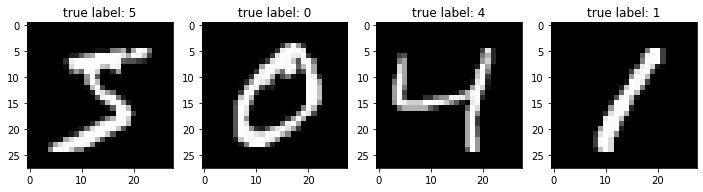

In [ ]:
# visualize the 4 first mnist images before shuffling the pixels
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

## fcNN as classification model for MNIST data
Now we want to train a fcNN to classify the MNIST data.
* we use a fcNN with 2 hidden layers and use the sigmoid activation function
* train it on train data and check the performance on the test data


#### Flatten the the images into vectors

Because we will use fcNN our input cannot be matrices or tensors. We need to flatten our inuput into a 1d vector. We do this in the next cell with reshap and look at the resulting shape of the flattened data.

In [ ]:
# prepare data for fcNN - we need a vector as input

X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

# check the shape
print(X_train_flat.shape)
print(Y_train.shape)
print(X_val_flat.shape)
print(Y_val.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


### Train the fcNN 

Here we define the nework, we use two hidden layers with 100 and 50 nodes. In the output we predict the probability for the 10 digits with the softmax actication function, in the hidden layers we use the sigmoid activation function and our loss is the categroical crossentropy loss.

#### Listing 2.4 Definition of an fcNN  for the MNIST data


In [ ]:
"""
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(100, batch_input_shape=(None, 784)))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
"""

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 3200)              0         
                                                                 
 dense_30 (Dense)            (None, 10)              

In [ ]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val, Y_val)
                 )

Epoch 1/10
391/391 - 3s - loss: 0.2567 - accuracy: 0.9279 - val_loss: 0.0796 - val_accuracy: 0.9786 - 3s/epoch - 7ms/step
Epoch 2/10
391/391 - 2s - loss: 0.0710 - accuracy: 0.9780 - val_loss: 0.0573 - val_accuracy: 0.9847 - 2s/epoch - 6ms/step
Epoch 3/10
391/391 - 2s - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0477 - val_accuracy: 0.9846 - 2s/epoch - 6ms/step
Epoch 4/10
391/391 - 2s - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0480 - val_accuracy: 0.9853 - 2s/epoch - 5ms/step
Epoch 5/10
391/391 - 2s - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0413 - val_accuracy: 0.9873 - 2s/epoch - 6ms/step
Epoch 6/10
391/391 - 2s - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0403 - val_accuracy: 0.9876 - 2s/epoch - 6ms/step
Epoch 7/10
391/391 - 2s - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0396 - val_accuracy: 0.9889 - 2s/epoch - 6ms/step
Epoch 8/10
391/391 - 2s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0473 - val_accuracy: 0.9879 - 2s/epoch - 5ms/step
Epoch 9/10
391/391 - 2s 

In the next cell we plot the accuray and loss of the train and validation vs the number of train eprochs to see how the development

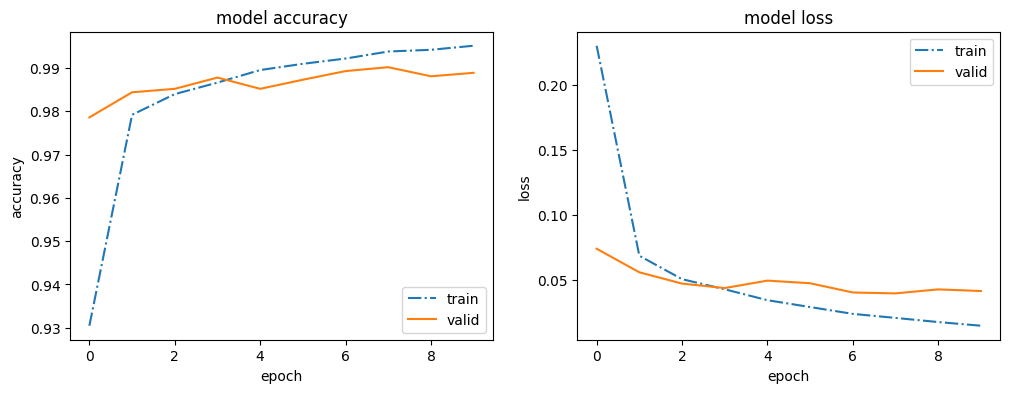

In [ ]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

#### Prediction on the original test set after training on original data

Now, let's use the fcNN that was trained on the flattened MNIST data to predict new unseen data (our testdata).
We determine the confusion matrix and the accuracy on the testdata to evaluate the classification performance.


In [ ]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

[[ 976    0    0    0    1    1    1    1    0    0]
 [   0 1126    5    1    0    1    1    0    1    0]
 [   2    1 1024    1    1    0    0    2    1    0]
 [   0    0    6  992    0   10    0    0    2    0]
 [   0    0    0    0  973    0    1    0    0    8]
 [   1    0    0    3    0  885    1    0    1    1]
 [   4    2    1    0    3    4  942    0    2    0]
 [   0    2    9    1    0    1    0 1014    0    1]
 [   5    0    5    0    1    2    0    2  957    2]
 [   1    1    2    0    5    6    0    1    1  992]]
Acc_fc_orig_flat =  0.9881



####  *We get an accuray of around 97% on the test data!*

#### Play the deep learning game and stack more layers and change the activation function from sigmoid to relu
<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
*Exercise: Try to improve the fcNN by adding more hidden layers and/or changing the activation function from "sigmoid" to "relu". What do you observe? can you improve the performace on the testset?*



In [ ]:
### Lets train a Convolutional Neural Network (CNN)!

* Use the previous code to complete this part of the task
* Change our fcNN to a CNN, it should look something like this:

![Hello World]( data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlgAAAFeCAIAAADWtfYLAAABhGlDQ1BJQ0MgcHJvZmlsZQAAKJF9kT1Iw0AcxV9Ti19VETuIOGSoThZERRy1CkWoEGqFVh1MLv2CJg1Jiouj4Fpw8GOx6uDirKuDqyAIfoC4uTkpukiJ/2sKLWI8OO7Hu3uPu3eAUC0yzWobBzTdNhOxqJhKr4rtrwigH53oRq/MLGNOkuLwHF/38PH1LsKzvM/9OXrUjMUAn0g8ywzTJt4gnt60Dc77xCGWl1Xic+Ixky5I/Mh1xeU3zrk6CzwzZCYT88QhYjHXwkoLs7ypEU8Rh1VNp3wh5bLKeYuzViyzxj35C4MZfWWZ6zSHEcMiliBBhIIyCijCRoRWnRQLCdqPeviH6n6JXAq5CmDkWEAJGuS6H/wPfndrZScn3KRgFAi8OM7HCNC+C9QqjvN97Di1E8D/DFzpTX+pCsx8kl5pauEjoG8buLhuasoecLkDDD4ZsinXJT9NIZsF3s/om9LAwC3Qteb21tjH6QOQpK7iN8DBITCao+x1j3d3tPb275lGfz/4t3J2cgL9dgAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+UFEQkOGCgmEUwAACAASURBVHja7J17PFTb+/j3uJZyTlEhxIzbuI5Ecj8UTiK5dioiTREhXZVKxCmXKOejDrqRipOSmjRKdep0QQ6iMBRSEuWeOzO/P/bvs7/zGUzj0v15/zGvvdfa67LXetZ61nrWWntwDAYDAQAAAIAfFS4oAgAAAAAUIQAAAACAIgQAAAAAUIQAAAAAAIoQAAAAAEARAgAAAAAoQgAAAAAARQgAAAAAoAgBAAAAABQhAAAAAIAiBAAAAABQhAAAAAAAihAAAAAAQBECAAAAAChCAAAAAABFCAAAAACgCAEAAAAAFCEAAAAAgCIEAAAAAFCEAAAAAACKEAAAAAC+VnhGGyApKenly5ejCiIpKfnq1athvfr6+vj4+Ia6i4uL19XVDRuEm5t7cHBwqLuQkFBzc/OwQXh5efv7+4f1EhERaWhoGNXrfPEMjKE8v3gGxlCh36hEgUiDSINIfx6JEhIS8vLymhBFiGMwGDAcAAAAAH5YwDQKAAAAgCIEAAAAAFCE3xn5+fkGBgZ9fX2fP+msrCwLC4vRLhIAwGdAV1c3NTUVygEAxqsIc3JyCAQCjUb7ml8sJCTEw8ODZY33yJEjtra2nzppc3Nzbm7utLQ0EK/vAAaDcfjwYR0dHUVFxWXLluXn53MYkEAg3L17d6KyMdrYUlNTFy9erKSkpK2t7e7uXlVVBVX5XWJgYEAgEAgEgoqKypIlSy5duvRVZa+oqGj+/PkIgly8eNHZ2RlmhJ+VvLy8yspKa2vrL5UBR0fHkydPQiv9DoiPjz927Jivr29KSoqEhMSaNWtGuyPx85OWlrZv376VK1emp6cfPnwYj8d//XkGxsxvv/128+bNc+fOzZs3b+vWrbdu3fp68pafn6+lpYUgyOPHjzU1NX8URZiUlGRpaamioqKmpkYmk7ENwXv27LG3t8ce6+rqUlVVvXLlCnp77ty5hQsXKioq/vrrrxQKhTlCV1fXoKCgiIgILS0tJSUlb29vTrKRkZGhq6s7depUzCU4OFhOTi4mJqaoqEhOTk5OTm79+vWol5mZWUREBPZkbm6urKzsmzdvEASZN29eaGiojY2NlpaWjY1NeXk582P29vaKiooGBgbR0dEDAwPMGTA1Na2srHz27Bm00m+d5ORkBweH3377jUQiRUZGMhgMdK5fU1NDIBBqamrQxxISEhYtWoQgSEtLCypgCIKsXbsWvS4pKUEfG0miUlNTdXV1sUTJZPLu3bs/GttIZGZmWlpaOjs7Kygo6Ojo+Pv76+joYL7Nzc1r165VUlIyNzcvKipCHevq6jw9PRcsWEAkEo2NjU+fPo097+npuX79+g0bNujq6hoaGl67dg3zQkORSCRNTU0/P7+mpiYQmM/PtGnTZGRk1NTUgoKC5syZc+PGDfYViiDIn3/+uWTJkitXrpiYmBCJxIULF3Z1dSEIsmvXLmNjY0VFxfnz5+/du7enpwdVZurq6hs2bNDS0jpx4oStra2mpiaH6pZZEaIXP4Qi7Ojo8PHxyczMvHTpEg8Pj6enJzZDKigoqK6uRm9v3LjBzc1tZmaGjl6jo6N37Nhx69Ytb2/v7du35+XlMcd57dq13t5eKpWak5NjZWXFSTZyc3NJJBKzy969eysrK318fNTV1SsrKysrK+Pj41EvBweHy5cv0+l09DY9PV1PT2/27NmYTo2Ojs7NzdXW1vb09ERX/qqqqlxdXS0sLG7evBkdHU2hUI4ePcqcnKioqIiISE5ODrTSb5qmpqa6ujpMliZNmqSgoFBcXMwmyPTp01EBQxDkxIkT6LWqqirzKG2oRI05tpF6xtLS0tbW1mF9T58+bW9vn5GRMWvWrICAANSxvb1dUVExISHhzp07/v7+YWFh2dnZWJDs7Gw7O7uHDx8GBgb6+fmhJ4n7+vpWr14tICBw6dKllJSUjo4OX19fkJkvCA6Hmzx5Mroxgn2FIghSX1+flpZ28uTJoqKinTt3cnFxIQjCxcV18ODBW7du/fnnnw8fPoyMjMTEw9XV1cHBITQ0dPv27b/99hvWf46EgYGBurr6rVu3IiMj1dXVq6urPTw8mKdD37Mi9PLyMjMzmzNnjqysrJeX17Nnz9BBoqqqKpFIxOzXly5dsrKymjRpEoIghw8f3rRpk5mZ2ezZs5csWWJlZcWyujZt2rSAgABhYeGffvoJ1Z0fpa6uTlRUlMM829ravnv37tGjRwiCoBrXwcEB87W2tpaWlubi4vLy8nr16tWDBw8QBImNjTU1NXVzc5OQkNDU1PTy8hq6IigiIjLSCVngG1KEqAQya6ZxznuGlaiJZfPmzQiC6OjoODk5xcbGssihpaXl4sWL5eTkyGRyeXk52m8qKip6e3urqqqKiYmZm5vr6endu3cPC6KiooLOdxcuXKikpPTXX3+hGr27uzssLExGRkZWVjY4OPjhw4cjnbAGPjU9PT1nzpyh0Wjo7J99haKTlrCwMGlp6UmTJi1atAjtjUNCQrS1tWfPnq2hobF8+XIsiICAgLa2tra2toCAwIIFC7S0tD5a0ampqZGRkT///DOVSvX09Jw3b15mZmZsbOzXWXo8Exvd48ePDx8+XFZWho1GOzs7hYWF0YnXyZMnN2/e3NjY+PDhwy1btqADjTdv3uzfvz8kJAR9nk6ns8yg1dXVcTgc53mg0+kjfQphWISFhU1MTC5evKinp3fz5k0cDsesbqWlpdELQUFBYWFhdCxcXl5eWVmpqKiIeqEfJaDT6eioCoWfnx81LADf37h7PMGHlaiJRUJCgkKhFBcXP3r06M6dO//5z39iY2NNTExQXwKBgF4ICQkxGIz29vYZM2b09fVFR0dnZma+ffsW/cCHjY0NFqGUlBRz/lGDcHl5eWNjo4qKCubFzc39+vVrcXFxEJLPSVxcXEJCwuDgID8///r169FxPPsKRRBETExMTEyMJaq//vrr9OnTtbW1qKUUM4zx8/Ojv9jFRzu32bNnX7x40cTEREJCoqSkxNzcXEJC4qstw4lUhO/fv3dzc1u9enVMTIywsHBpaamlpSVmcly2bFlYWFhOTk5JSYmsrCxqbkKL++TJk8wLJCwICgqObpLLxTVt2rS2tjbOgzg4OPj4+HR2dqanpy9dupRZiTIv/g0ODqI6r7u728PDAx13j0RbWxs6AgC+XdAaZLYxtrS0zJgxY6g65Py0zLASNebY2GhrEolEIpE8PDy2bt165MgRTBHy8PxPq0czcOjQoevXr8fExCgpKfHx8bm7u2MtlyU/AwMDaJCurq558+bBYYwvjoODw5o1awQEBMTExLDKZV+hw/ard+7c2bt3b2RkpLGx8ZQpU06dOpWQkDBSouw/Sebu7p6bm9vd3c3FxXXjxo0PHz6gA7K8vDzOpyifk4k0jZaWlnZ1dfn6+qLdB8v5iunTpy9atOjSpUuXL1/GLMUiIiIzZsyY8LU0ZWXlioqKoe58fHwsu1pQfvnlF0FBweTk5H/++YfFio1tZ2hoaGhubkaHxkpKSrm5uWwy0NfXV1NTo6amBq30W1eE4uLiT548waxPNBoNHcP99NNPqMED9UJ3V3EibMNK1E8//YRFNarYOGH27NkdHR3sn8nPz7e2tlZXV+fj42MwGOiq5NA8o9fopFZZWbmsrGxUI07gUyAkJKSgoCApKck8xGFfoSPJgJqamqWl5ZQpU1gqfbSEhoampqYODg6mpaVFRkZOnz6dSqVSKBReXt6vswzHrgirq6tLmejp6cHj8dzc3OiaR21tLcv+EXTkcuXKlcrKymXLlmHj1g0bNhw/fjwpKammpubJkyeHDx9GVyDGg7Gx8bCKSlpa+vnz5yUlJT09PcwfeOXm5ra1tY2KiiIQCCw7ESgUCoVCef78eWBgoKSkpJ6eHoIg69evLyoqCgwMpNFoNBrt3LlzmGkXpbCwEIfDMW/VA75RnJycLly4kJKSUlxcvHXrVhwOZ2dnhw7s5syZk56ezmAwaDQalUodKmw3btxoa2vr7e1lHj4PK1EqKiqdnZ03b95EEOTq1atDj/2NFNuwBAcHR0REPHz4kEajXbx4MSkpydjYmH0QWVnZx48f9/b20un0Y8eOsSwrvnr1Kjo6urq6OiYm5uXLl46OjgiCWFtb//zzzxs2bMjPz6+pqcnKylq3bh0IzFcC+wodKcjz58/r6+sRBHnw4AHz9uDRMmPGjPr6ehkZGWVl5ZcvXy5YsEBCQkJCQmKcywpfoyL09PS0ZKKyslJSUjI8PDwoKEhPT2/jxo1kMpkliIGBgbCwsKGhIWpcQlmzZs3u3bvPnj3766+/rlu37unTp+hm8fFga2tbV1c3dJe5qamppaWlq6urkpLShg0bmL3s7e37+/uHHrdfvXp1fHy8paXl27dvjx07ho651NTUkpKSysvLbWxsHB0d09PTlZWVmUNdvnzZysoKnTQA3zTr1q1zd3ePjo52dHR8/fr1qVOnREREUK/ff//9zp07GhoaYWFh2NgOIzAw8MmTJ9ra2oqKik+fPmUvURISEjt37gwICJg/f/6///6rr6/PYWzDoqurW1xc7Ovru2zZsv/85z9OTk47duxgH2T79u3Tpk0zNDQ0MjJqaGgwNTVl9jUzM6usrLSwsED3eKMzQkFBwZSUFCEhoXXr1llYWERHR8vLy4PAfCWwr9BhWbZsmb29va2trZ6e3qlTp9zc3MaTgby8vAULFiAI8ujRI/Tiq4bxGfnw4YOqqiqFQvkMaR06dMjb25vz53NycmRlZRsaGpgdNTQ0Lly4MNqkGxoaSCRSdXU1AwD+l7FJ1Jdlw4YNW7duhboDvmM+05dlBgcHm5ubo6KiJk+ezMnYZPx4eHjIyclx8q3Rvr6++vr6qKioRYsWzZo1a/xJv379ev/+/djmQAAAAOBr5jMpwuLiYk1Nzezs7Li4uM+za0hAQMDb25uTtE6ePGlgYIAgCMs635jR0NDg8OA/AAAA8MWBP+YFAAAAYEYIAAAAAKAIAQAAAAAUIQAAAACAIgQAAAAAUIQAAAAAAIoQAAAAAEARAgAAAMD3y6j/hqmmpgb7Pxdmzp07l5qampGRweKura19/vx5XV3dt2/fsnj5+vqKioru3LlzaGxVVVV+fn7DxnbgwIGRMvDy5cuRYhspA9bW1qN9nS+egbGV5xfPwBgq9FuUKBBpEGkQ6c8mURP1FdNRH6jv6+t7/vz5UHcpKam2tjbmf25DERAQkJaWrqysZP63B5SZM2fy8vIO/ccZBEGUlJTevHkzbGyzZ88eKQP9/f0jxTZSBn7++efRvs4Xz8DYyvOLZ2AMFfotShSINIg0iPRnkyj0H6O+gCJE/vefRTG4ubkZDAbLfz8iCILD4bi5ubE/IP0fsywXFw6HG/Y/SHl4eOh0+kixjZQBZIR/NOXh4RkpA1xcXGN4nS+egTGU5xfPwBgq9FuUKBBpEGkQ6c8mURP1v06jVoRgGgU7EtiRwDQKIg0iDaZRMI2CHQnsSCDSINIg0j+waRQAAAAAvhvg+AQAAAAAihAAAAAAQBECAAAAAChCAAAAAABFCAAAAACgCAEAAAAAFCEAAAAAgCIEAAAAAFCEXzOOjo7h4eGcP7969eqzZ89+K28XFBQUGBgIkvrFyc/PNzAw6Ovrg6L4JmhoaNDQ0Bj2IyYA8M0owp6enrCwMFNTUyUlJX19/aCgoI6OjvFHe+fOnaqqKkdHR2bHzs7OkJAQPT09RUVFExOTpKSkCX+d2trabdu26evrKyoqmpqanjp1CvOytrYmEAjy8vJ6enrbt29//fo1c0AvL6+LFy++ePEChPXLEhIS4uHhwcfHh96Gh4cTCIS4uDj0trCwkEAg1NTUfA1ZffjwoZubm5aWlqqqqp2d3b1795h9z549a2pqSiQSdXR04uPjP4VIIwjy+vVrLy8vdXV1ZWVlW1vbhoaGMScUFxe3ePFiZWXlefPmkclkGo3GSQZERERsbW0jIiK+b7H08/MzMjJSVFTU1dXdvXs39sEz9jJw6tQptNyWL19eUVEBrZvnq81ZS0tLTk7OmjVr5OXl37x5ExISUldXN552i3L8+HE7OzteXl7MZXBwcO3ateinYGVlZZ8/f/7s2bMJf50nT550dnZu375dXFz833//DQ0NZTAYbm5uqK+ZmZmfn9/r16+PHz9ua2t79epVERER1GvGjBlGRkaJiYnBwcEgr1+KvLy8yspKa2vr/xlFcnElJyeTyWT0m/pfD7dv35aSklq5cuW0adNSUlLIZPKFCxdIJBLaA4aHh/v4+GhpaXV1dXV3d38Kkf7w4cOKFStmz54dHh4+Y8aMqqoqLq6xj7knT568fv16SUnJvr6++Pj41atX3759e8qUKezbFGorsrS09Pf3x1rT94eoqOiuXbtEREQaGhoOHjz49u3b48ePs5eBq1evhoSEBAYGzps3Lyoqys3NLTs7e9KkST90C2eMie7u7tDQUF1dXSKRaGpqmpGRgbo3Nzd7e3urqakpKyuTyeS6ujrUvbq6Go/HJycnm5ubq6mpOTk5vX//nsFg1NbW4vH4kpISLOaAgABnZ+ehKcbFxcnJyfX29mK3WlpaysrKe/bssbOzCwsL4yTbb9++ZUmOwWBcvXoVj8cXFRUNfX6k10lJSdHR0UlISDAwMCCRSLt370b/QITz13Fzc3N0dESvly5dunXrVqxgtbS0goODmR++fPkyiURCkwC+CLt27SKTycwuYWFhZmZmJiYmVCqVwWAUFBTg8fjq6moGgzE4OBgZGamtra2goGBtbZ2bm4uF0tHRiYiIWLFiBYlEMjMzKywsxLxycnLs7OyIRKK+vn5UVFR/f/+E5HxgYEBVVfXQoUMMBqOvr09DQ+P06dOfooiYRfrEiRMLFizo6emZ8FQqKirweHx+fj77DGAYGxufOHHiB5HSM2fOKCgo0Ol0NjLAYDAcHR03bNiAXjc1NcnKymId+A/LGIdpvr6+169f379/f3Z29s6dOzFDfEBAAI1GS0pKSktLa2lp8fHxYQ5FpVIvXLhw//79pqamo0ePIggiKSmprq5+7do1bHKWlZW1dOnSoSm2t7dPnTqVh4cHNW9GRkZu376dQqH09vYWFRVxPq7n5+cnEonMjn///Tcej0fHSiyweZ3Gxsbm5ubbt2+npaWlpaVlZ2eP9nWmT58+1H3SpEn6+voPHz5kdiSRSO3t7aWlpTAz+1Lk5uYOlRAcDufk5HT69GkW9zNnziQmJgYFBVGpVFVVVTKZ3NzcjPmmp6eHhoYWFBSQSKSAgADUsaqqytXV1cLC4ubNm9HR0RQKBW0g46e3t7e3txcVNhqN1tLSMn36dCsrK21tbTKZXF1dPVFFxCzSjx490tPTCw0NnT9//uLFi48fPz70X+vGQFtb2/nz5wUFBfF4PIdtikQiPXr06EcQ0devX1+7dk1VVXXoX/QxywCDwSgpKdHU1ES9hISE8Hh8cXHxD97Ax6IIKysrb968if7jlLi4uLGxsYeHB6obqFSqv78/iUQiEolBQUEFBQVPnz7FArq7uwsKCgoKCpqZmWFFb2VllZmZibWfDx8+mJmZsaTY2NiYmprq7e2NGljOnz9vaGhob28vLS29d+9efn5+DnNeV1c3Y8YMVJsyO4qJiQ19mP3r4HA4Hx8fHh4eWVlZEok0qte5f/9+SUmJp6fnsJmcNWtWfX09y2oHKuigkL4UdXV1oqKiQ93t7e2fPXuGrVphinDFihXm5ubS0tJ79uzh4+NLT0/HfG1sbPB4PBcXl42NTXl5Obr7JjY21tTU1M3NTUJCQlNT08vLKy0tbUJyfuzYsZkzZ9rb2yMIgi7UxcTE+Pr6JiQk0Ol0FxeXCdn+wyLSDQ0NN2/epNPpp06dIpPJUVFRKSkp4xyIyMnJzZ07Nzs7+/z580JCQhy2KRERke++4cTExMjKyhoaGvLw8CQkJLCXgQ8fPvT09AgLC58+fXr+/PkNDQ3CwsJNTU2gCEdNWVkZDofT0tJica+trUUQBJtvEYlELi4u5u0D4uLi6MWUKVOwRd0lS5bU1dWhioRCoRgZGf3000/M0XZ0dJDJZENDwzVr1qAuL1++xFKZMmWKlJQUhznv6enBNjswG4eH/Ztj9q8jLCyMWdWnTp3a1tbG4evQaDQfH5/g4GA1NTUOs41q+p6eHlBIXwQ6nd7X1zdUchAEERQUtLGxYZ4U0un0V69eKSoqord8fHxycnLDtoKpU6cyGIz29nYEQcrLy6lUquJ/2bVrV2Nj4/hnUenp6WfOnImLixMUFETzhiCIm5vbokWL1NTUQkJCXr9+nZOTM85Uhoo0nU6fMmVKUFCQsrKynZ2dlZXVxYsXx5OEqqoqhUI5c+aMnJzcjh07Ojs7OWxT/Pz8333DWbVqFYVCiY2Nffv2bVhYGHsZwBAWFp49e/awUg2KcHTLih99bKgpaajvrFmztLW1KRRKf3//jRs3rKysWLSgq6urpKQk8wEJHA7HPKvjfKuCkJAQprGYOyZO9lizvA7L4j+Hr1NRUeHs7Ozt7c2ybZVlJsoy+UAHDUNHwcBnaiRcXNOmTRsqOSirV6++cuUK89+TsoyrWPTZsJLT3d3t4eFR9l/Ky8vLy8vHs8EEQZCrV68GBQUdP35cWVkZdUGNYwQCAb2dPXs2Dw/PePZzjiTS06dPl5KSwhrmnDlzxpmKgICAgoKCnp7esWPHXr58efnyZQ7bVGtr63ffcISFhYlE4uLFi8PCwlJTU5n/w3aoDEydOpWfn7+pqcnKyury5cvTp09vamoSFhYGRThqlJSUEATJy8tjcZeSksLhcGVlZehteXk5nU7nZLpmaWl5/fr1+/fv9/f3m5iYMGtBFxcXUVHRI0eOMGs7aWnply9fotcDAwOcmz6UlZWbm5vfv3/P7GhkZFRdXV1SUvKpX6e8vNzJyWnDhg3Y1HbYOeuDBw90dXVZ+hocDqeiogI66UuhrKw80i5zGRkZTU3N1NRUTM9JSkpiC7p9fX0vXrz4qNgoKSnl5uayeaCjo6O+vp5zM2ZGRsaePXuOHz+OrQYhCKKgoMDLy4u1nbdv3w4MDDCPuvr6+urr6zk/pzSSSKuoqLx69QobAbx+/ZplbNfU1MRi/x/VBL2rq4vDNlVRUcG56eU7MF2ggyo2MoDD4dTU1PLz89Hb5ubm6urqH6eIJlIRysnJmZqaBgQEZGdn19bW3rt3Dz3VMHPmTHNz87CwsMLCwmfPnu3bt49EIqmqqn40wsWLFzc2NoaHhy9atGjy5Mmo44cPH5ycnAYHBz08PCoqKkpLS0tLS9GOYOXKldnZ2WVlZQwG49SpUyMN1YeipqYmLCzM0uNYWFhoaGh4eHhQKJSysjIKhXLw4MEJfx0ajbZq1SoTExNtbW30XSorK5m7uYqKitu3b7u5uQ0ODq5bt445wtzcXHV1dZgRfkGMjY3ZKCoXF5dbt25ht05OTikpKVQqtaqqKjg4uLe318bGhn3869evLyoqCgwMpNFoNBrt3LlzISEhzA+cPHlST0/v8ePHnOT28uXL27Zt27Jli4CAACpsqM1DUFDQ0tLyjz/+uH//Po1GCwwMlJCQmD9/PhawoKBAT0+Pw0NKbETa3t7+3bt3v//++/Pnz69du3blyhWWEti4caOent7AwMBHU+nu7vbx8aFQKIWFhXfv3vXw8BgcHDQ2Nv5om0LDFhcXow9/lzx+/Dg4OPj27dtFRUVXr1719/fH4/EKCgpsZACVz6ysrNOnT5eUlGzZskVERGToPoYfjTGeIzxy5EhUVNTevXubm5ulpKS8vLxQ95CQkH379rm4uAwODuro6AQFBXES27Rp0wwMDG7fvr1t2zbMsba2Fp2lMR/eun37trS0tKGhoa+vr4uLCz8/v6GhIefDGV5eXkdHx/T09CVLlvxfEfDwnDp1KioqKjQ0tKWlZfbs2djocgJf5+HDhy0tLX/99ddff/2FuoiKimK7Q2/cuHHr1q0ZM2bo6emFhYWxbN7JyMjAShj4Itja2kZGRpaUlAw7Evrll18kJCSwmZazs/O7d+8CAwNbW1sVFBTi4+M/anpSU1NLSkqKioqysbHh5eWVl5dfuXIly4wQh8MNu6trKNevXx8YGGD+IJG1tXV0dDSCIMHBwSEhIT4+PoODg2pqaidPnmTea4bOBWfPns1JKmxEWkZGJi4uLiIi4uzZs7NmzfL29l6xYgXL64iKinKyqMHDw8PLyxsZGdnQ0DB58mQlJaXExERZWdmPtim0Wc2cOdPAwOA7NorW1tbu2rWrtbV1+vTpCxYs2LJlC7rsx0YGrKys3r17l5CQEBYWpqamduLEiR/9ECEy1nOE3y5NTU0aGhoVFRXfSoazsrIWLlzY19cHh/m+LIcOHfL29v5SqVtaWm7cuPFTp7J//349PT3stO4noq2tTUZGJjk5+ZOmQqfTLS0tL126BKILfKpzhN8uQkJC6OjyW8lwT09PREQE86dwgC+Ch4eHnJzcF/nWaFtbW0VFxaZNmz51Qjk5ORs3bvzUOwlzc3PFxMTY7BebEN69e2dpabls2TIQXeCj4D66+RMAAAAAvmPgb5gAAAAAUIQAAAAAAIoQAAAAAEARAgAAAAAoQgAAAAAARQgAAAAAoAgBAAAAABQhAAAAAIAiBAAAAABQhAAAAAAAihAAAAAAQBECAAAAAChCAAAAAABFCAAAAACgCAEAAAAAFCEAAAAAgCIEAAAAAFCEAAAAAPCtwDPaAElJSS9fvhxVEElJyVevXg3r1dfXx8fHN9RdXFy8rq5u2CDc3NyDg4ND3YWEhJqbm4cNwsvL29/fP6yXiIhIQ0PDqF7ni2dgDOX5xTMwhgr9RiUKRBpEGkT680iUkJCQl5fXhChCHIPBgOEAAAAA8MMCplEAAAAAFCEAAAAAgCL8vklNTSUQdkl/SwAAIABJREFUCAQCQUVFZaRnVFRUrl+//nnyc+jQIVtbW86fj42N9fb2/iaKWldXFy3qhISEYR9ISEj49ddfv1T2goKCAgMDxxAwPz/fwMCgr68Peo1vgoaGBg0NjTdv3kBRAKAI/z/Lly+vqqqKjY1l88yyZcskJCTGmdC5c+dsbW1JJJKmpqa7u3tVVdX4M//+/fs///zT19cXc5k/fz6BQHjx4gV6u3fvXgKBcOTIkbHFn5aWhqouGRkZXV3dzZs319fXjzm3Dx8+rKqqkpeXH+kBeXl5U1PTcZZJbW3ttm3b9PX1FRUVTU1NT506hbp3dnai74K6Hzp0qLu7mzmgl5fXxYsXsaLjnJCQEA8PD2zXQHh4OIFAiIuLQ28LCwsJBEJNTc3XIO0DAwP+/v6LFy+WlZV1dXVl9vLz8zMyMlJUVNTV1d29e3dra+t4EkpISHBwcFBUVFRUVGR2v3PnjoODg7q6uoqKyrJly7Kzs8eTSlxc3OLFi5WVlefNm0cmk2k0GnsZQBEREbG1tY2IiPi+e7aenp6AgAB1dXU1NTU/P7+Ojg7QaqAIx0VISIiqquo4I8nMzFy4cOGxY8eioqIaGhqcnZ0/fPgwfuWqpKQkKyvL7CguLp6RkYEgSH9/f1ZWloiIyPhzTqVS9+7dm5eX5+Hh8enK2cjIaMuWLeOM5MmTJ52dndu3b09OTnZwcAgNDT158iTmu23btosXL7q7u2dkZLi5udHpdMxrxowZRkZGiYmJo0ouLy+vsrLS2tr6fxoPF1dycvJo9wd+BtAdcC4uLpqamixeoqKiu3btOn/+fGBg4IMHD7Zu3TqehLq6uszNzR0cHIZ6LV269NixY4mJiZqamhs2bCgsLBxzKpMnT16/fn1iYuIff/wxMDCwevXqzs7Oj8oAgiCOjo7Xrl0b7Q7Sb67XolKpMTExJ06c+Pfff3fs2AE9+RjbzGiRlZXdtGnT3Llz9+zZs23bNhKJdOjQIdQrMTFxyZIlysrKqqqqa9eura2tRd0pFIqqqmpNTQ16e/jwYUNDw/b2dvYJaWhohISELFu2TFNTc9myZWVlZZjXlStXFi5cqKCgYGhomJycjLkPDg5GRkZqa2srKChYW1vn5uYyR5iZmamsrDw0IWVlZVlZWTwen5mZyeyuo6MTERGxYsUKEolkZmZWWFiIeR0/flxLS0tFRSUoKMje3j4sLGxotE+ePMHj8Q8ePEBv7969u3DhQiKR6OTktHPnThsbGw4L3MTE5Pjx48wuWlpaBw8eNDY2ZjAYt27dcnV1tbCwOHz4MIPBePDgwYoVK+bOnUskEq2trbHU2VTBhQsX8Hh8T08P6nXx4kU8Hl9XV8dgMJqbm729vdXU1JSVlclkMuqI8vTpU0dHRyKROG/evH379vX29jLn0NzcPD4+nuVF/vzzT1lZWRkZGXNzc2b3lJQUHR2dhIQEAwMDEom0e/fuwcFB1OvVq1crVqwgEolmZmbHjh1jziczbm5ujo6ODAbjw4cPeDz+woULWCbxeHxWVhbzw5cvXyaRSFgSnLBr1y4ymczsEhYWZmZmZmJiQqVSGQxGQUEBHo+vrq5mL4RsJConJ8fOzo5IJOrr60dFRfX39zPGzYYNG1xcXEbyPXPmjIKCAp1OH2cqiYmJRCKRzQOampqxsbGMiaCiogKPx+fn57ORAWaMjY1PnDjB+E7p7OwkEomJiYnoLZVKJRAIb9++ZQCjZIwzQjk5uYiIiOTkZCkpqejo6Li4uN7eXgRBOjo6fHx8MjMzL126xMPD4+npiT6/ZMkSS0tLPz+/gYGBgoKCP//888iRI4KCgh9NKCMjIzo6Ojc3V1tb29PTEx19l5WVbdq0yd7e/saNG+7u7vv27fvnn3/Q58+cOZOYmBgUFESlUlVVVclk8kjHVph5+vRpZWWlgIDAUK/09PTQ0NCCggISiRQQEIA63r9//+DBg1u3bqVQKP39/U+ePBk22vb2dgRBpk+fjiBIU1OTp6enkZERlUo1NTW9cOECh0X97t276upqEonE4i4hISEkJFRUVJSRkbF06VJmO6q1tXVKSkp2draJicnatWvfv38/qipAywFdDAsICKDRaElJSWlpaS0tLT4+Pugzvb29ZDJ55syZ165dO3z48LVr1zgxzLq7u1dWVg47aG1sbGxubr59+3ZaWlpaWhpmTPPz8xscHMzIyAgMDGQzjWtvb0fLmQVlZWUxMbGHDx8yO5JIpPb29tLSUs4FPjc3d2gV4HA4Jyen06dPs7izF8JhJaqqqgodzdy8eTM6OppCoRw9evSTjoBfv3597do1VVVVHA736VLp7e29fPlyc3Ozmpra+GNra2s7f/68oKAgHo/nUAZIJNKjR4++12kMjUbr7e2dN28eequpqclgMIqLi2GC95lMowYGBvr6+giCGBoa6urq9vf3o/YHLy8vMzOzOXPmyMrKenl5PXv2rKmpCVvH6urqOnDggJ+fn6+vr7q6OicJWVtbS0tLc3FxeXl5vXr16sGDBwiCnD17VlVV1cPDY86cOStXrjQ2Nk5KSsL6oBUrVpibm0tLS+/Zs4ePjy89PX08BWRjY4PH47m4uGxsbMrLy1H1cPbsWWNjY0dHRykpqYCAgEmTJg0NODg4GBsbu2jRInT5JCMjg4+Pz9/fX0pKavXq1ZjsctJhoQsewxbO+fPnHzx4YGZmxmySWr58uby8vLi4uI+PDw8PT25uLudVUF1dffToUXFxcUlJycbGRiqV6u/vTyKRiERiUFBQQUHB06dPEQS5ceNGS0tLaGgogUDQ19f38PA4c+bMeMoZh8OhuZWVlSWRSGhjLi8v//fff/fu3SsvL6+rq7tq1aphw96/f7+kpAQbdbEwc+ZMliVPtDDRguWQuro6UVHRoe729vbPnj3DVq04EcJhJSo2NtbU1NTNzU1CQkJTU9PLyystLe0TtfmYmBhZWVlDQ0MeHp6RNjRNCHJycoqKigEBAdHR0Wh3MWZyc3Pl5OTmzp2bnZ19/vx5ISEhDmVARERkVBX9bYH2rsLCwp6eng4ODmixYF0u8MkVIR8fHz8/P/NFT08PgiCPHz9etWqVhoYGgUBAF1RQaz6CIJMmTYqJiTlz5oyYmJi7uzuHCUlLS6MXgoKCwsLC6EdtXr58SSQSmUf96CYFOp3+6tUrbN2ej49PTk5unPsXxMXF0YupU6cyGAx0klddXa2goIC9l6Sk5NCAe/bsaW1tjYyMRG9rampkZGR4eXnRW5bNBWxACxYtZBYsLCwuX76sq6s7ZcoUzPHNmzebNm1asGCBrKwsgUDo7Ozs6uripApUVFRkZWUXLlw4ODh49OhRbm7u2tpaBEGwoiYSiVxcXGh5vnz5UkxM7Oeff0a9lJSUPnz4gE49x4awsDA2npg6dWpbWxtazjgcDtt3M+wGHBqN5uPjExwczGbOwTLpYZZYTqDT6SN9XENQUNDGxoZ5UvhRIRxWosrLy6lUquJ/2bVrV2NjI/PS5gSyatUqCoUSGxv79u3bsLCwT9e5UCiUtLQ0Jyen4ODgsrKy8USlqqpKoVDOnDkjJye3Y8cOrFf5qAzw8/NzXtHf4sIWejF79mwxMTHQZ2OGZwKr5P37925ubqtXr46JiREWFi4tLbW0tGRuzEVFRdzc3NXV1c3NzcLCwpxEOzAwwDzHGvY7OMxJsHR54+9KuLi4hkreRz/HExgY+Pjx4/Pnz//0009Yxri5ubEHmK/Zg47yWltbZ82aNVR5hIeHM48JEATx9PQUEhJKTU2VkJDg5uZWV1fnsArS09P5+flnzZqFqbeRWh37Kvic5VxRUeHs7Ozt7e3o6MjGtsxi1US3Sg6dVbDJ27Rp01DdPJTVq1cvXbqUeVLOXgiHfdPu7m4PD4/Nmzd/hjYvLCwsLCxMJBJFRETs7e3Xrl3Lsg9rokAHixoaGuXl5UePHv3jjz/GHJWAgICCgoKCgoKWlpampubly5cx8wB7GWhtbeW8or85ZsyYgU4Bd+/ezTxBBMX2mWaEw1JaWtrV1eXr64vWBIu9qLKyMigoKDY2Vk1NbfPmzRx+2q28vBy9aGhoaG5ulpKSQqeJzAPM0tJS1J2Li0tSUhJb++nr63vx4gXqhTWnvr6+8ffaBAIBy0BPTw/zRwIZDMaePXsePnx47tw5VEyxqS3zY5zPUwkEgoCAQEVFxUimY2xuiiBIb29vcXHx2rVrpaSkuLm56+vr0QkHJ1UgJycnJyfHrAWlpKRwOBz2puXl5XQ6HauC+vp6bPN9WVnZ1KlTmd9XQEBg/CNxAoHAYDAwGWAphPLycicnpw0bNqxZs4aNTNbX1+vq6rKoTxwOx+ZE6VCUlZVHqgIZGRlNTc3U1FRMz7EXwmFRUlLCLNjD0tHRUV9fP7GnGNGGwHy8pK+vr76+fsK34NPpdJZDLE1NTWM+okOn0zEjx0dloKKiYkKWJ79OFBQU+Pn5//33X/Q2Pz8fh8N9x+/7bShCPB7Pzc2NLuPV1tYyr/b39PT4+PjY2dmZmJiEhYXRaDTsANZHrSsUCuX58+eBgYGSkpJ6enoIgqxcufLp06dHjx6tqak5e/bs33//7eTkhD7v5OSUkpJCpVKrqqqCg4N7e3ttbGyYuxt0y3tjY+NIA3wOjUt37949f/78y5cvf//9d+Zvxe7evTszM3PPnj3v3r0rLS0tLS1FtcWyZcva29vRPTL5+fnY7p6PwsvLq6+vn5eXx8nD/Pz8c+bMuX//PoIgXV1d+/btw+YfY6iCmTNnmpubh4WFFRYWPnv2bN++fSQSCT1hYmpqOn369ICAgMrKyrt378bFxbEs4JFIpOvXr1dVVb17926kb+l+FHRLanBwMI1Ge/ToUUpKCrM1bNWqVSYmJtra2mg5V1ZWMs8Cy8rKLl686OHhoaWltWjRIuZoc3Nz1dXVRzVRMDY2ZqOoXFxcbt26hd2yF8JhWb9+fVFRUWBgII1Go9Fo586dCwkJYX7g5MmTenp6jx8/5jDDz58/Ly0t7ejo6OzsxArn8ePHwcHBt2/fLioqunr1qr+/Px6PZx5IFRQU6OnpxcfHc5jKmzdvSktLGxoaGAwGWguoqg4ODj537tzjx4/z8vJCQ0MfPHjA8gmFjRs36unpMdt7RqK7u9vHx4dCoRQWFt69e9fDw2NwcNDY2PijMoCGLS4uRh/+LhEQELCzszty5MidO3dycnJCQ0PNzc3Hf5LqR2RsxyfKy8sZDAYej2e5SE9PNzIy0tXVtbKySklJwTaU79y508zMrLu7G43hn3/+UVBQ+Pfffz96fCI8PNzKygrdhl5aWop5ZWRkmJiYyMvLGxgYYLuH0Z3rERER8+fPl5eXt7KyevjwIUucaWlpOjo6eDwe21Z++PBh/P+ir6+PbXZPSUlBr4uLi/F4fGNjI/PxCVVV1dDQUDs7u+joaNSdRCKxxIbFcO/evUWLFs2fP9/Z2Xnbtm2cH5+4d++ehoYG8/kELS0t5kMjDAYDOz5RXFxsbW29YMECY2Pj5ORkLS0tNANsqoDl+AQzTU1N3t7eqqqqSkpKa9euff36NeZVUlLi4OBAJBI1NDT27NnDEvz9+/dr1qwhEol4PL6goAB1xA8BPeeAHp/Awq5duzYgIID5+ISCgsKvv/4aHx8vIyMzMDDAYDBOnjzJEhUaA3p8Au3fTUxMwsPDOzs7h26pT0tLG5XMt7a2KikpFRcXMx+fwA6BDA4O/vLLL8zHJ0YSQjYSlZOT4+joqKioqKamZm9vf+nSJeYM7N+/H/2EAocZRvPDUjgvXrxYu3Yteq5jwYIFmzZtevXqFXOoGzdu4PH4c+fOcZjKjh07WGoBLYFjx44tXrxYVVVVWVl5yZIlqampLAGXLFmio6PDycmNvr6+zZs3GxkZEYnEuXPnrlq1CjuOMpIMMJ+TMTIyGv/5kK+Z7u7unTt3kkgkFRUVX1/ftrY2OAsxBpCvOXMaGhrYgbCvGX19/U+dT0dHRxbN9wNy4cIFbIwyZrKyshYuXNjX1zfagIcOHfL29v5S725pablx48ZPncr+/fv19PRYjoROOG1tbTIyMp9anul0uqWlJct4AgAm8hzhDw6dTo+Pj0e3nCQkJHR0dLAY3yackJAQzvfXfE/8/fff9+7da25uptFoJ06cGNUHWoelp6cnIiIC277LOR4eHnJycl/kW6NtbW0VFRWbNm361Anl5ORs3Lhx2P2xE0hubq6YmBib/U0Twrt37ywtLZctWwb9FfBRvur/I5w3b97OnTvt7e2/QkXo7Oz87NmzwcFBdLM7h8cigdFy5cqVw4cP19fXz5gxA/0gwKfupgEAAEX4Wdm/f/+w7nPnzrW0tITqAQAAAH7oGSEAAAAAfGpgjRAAAAAARQgAAAAAoAgBAAAAABQhAAAAAIAiBAAAAABQhAAAAAAAihAAAAAAQBECAAAAAChCAAAAAABFCAAAAACgCAEAAAAAFCEAAAAAgCIEAAAAAFCEAAAAAACKEAAAAABAEQIAAADAtwfPaAMkJSW9fPlyVEEkJSVfvXo1rFdfXx8fH99Qd3Fx8bq6umGDcHNzDw4ODnUXEhJqbm4eNggvL29/f/+wXiIiIg0NDaN6nS+egTGU5xfPwBgq9BuVKBBpEGkQ6c8jUUJCQl5eXhOiCOEf6gEAAIAfGjCNAgAAAKAIAQAAAAAU4beLo6NjeHj4J00iNjbW29v7WymQrKwsCwuL0a5SAOzJz883MDDo6+uDovgmaGho0NDQePPmDRQF8A0rwp6enrCwMFNTUyUlJX19/aCgoI6OjvFEmJCQ4ODgoKioqKioOKqA79+///PPP319fZkdOzs7Q0JC9PT0FBUVTUxMkpKSPmcJ/P777wQCQUZGRkNDw83N7fHjx8wBzc3Nubm509LSQL4nkJCQEA8PD2zXQHh4OIFAiIuLQ28LCwsJBEJNTc3XkNWBgQF/f//FixfLysq6uroye925c8fV1VVDQ4NAIBQWFo4zoZHaFJsMjI2cnBwHBwclJSV1dfWNGzey+La3t+vr6xMIhN7eXsxRRETE1tY2IiLi+xZLNhV6+vTphQsXKioqGhgYREVFDR0ZJyQkEAgE5lkEhUKxsLBQUlLS09M7cuQI8w4S9lUAivBT0dLSkpOTs2bNmqSkpO3bt1+7dm3Lli3jibCrq8vc3NzBwWG0Ac+dO6ekpCQrK4u5DA4Orl279tq1azt27Lh48eKmTZtG2j316UpAREQkKyvr6NGjoqKiK1euvHfvHsss+eTJk6C9Joq8vLzKykpra+v/aTxcXMnJyV/hzBvtv1xcXDQ1NVm8Ojo65s6dyzKqm/A2xSYDY6C4uNjV1VVWVjYhISEuLk5HR4flgV27dklKSg5rK7p27dpod5B+W4xUoVQqNSQkxN3d/ebNm7t27UpISDh16hTzA6Wlpenp6TNnzsRcCgsLfX19LSwsrl+/HhwcnJSUhAX5aBV88zDGRHd3d2hoqK6uLpFINDU1zcjIQN2bm5u9vb3V1NSUlZXJZHJdXR3qXl1djcfjk5OTzc3N1dTUnJyc3r9/z2Awamtr8Xh8SUkJFnNAQICzs/PQFOPi4uTk5Hp7e7FbLS0tZWXlPXv22NnZhYWFcZjzxMREIpE4qpc1MTE5fvw4s8vVq1fxeHxRUdHQhwcHByMjI7W1tRUUFKytrXNzc9mXAIPBMDAwYI7/ypUrqqqqPT09bEogNDRUX18f81q3bp2FhQXzw/X19Xg8/unTpwxgIti1axeZTGZ2CQsLMzMzMzExoVKpDAajoKAAj8dXV1ezkQEGg6GjoxMREbFixQoSiWRmZlZYWIh55eTk2NnZEYlEfX39qKio/v7+8Wd7w4YNLi4uQ93Ly8vxeHxBQcGEFA6bNjVSBkbFunXrNmzYMJLvhQsX3NzcLly4gMfjh7YaY2PjEydOfPfyObRCQ0NDjY2NsdvffvvNx8cHu0VHMP/++6++vj7WeUZERBgaGmLPHDp0aOHChZxUwXfAGGeEvr6+169f379/f3Z29s6dOzFDfEBAAI1GS0pKSktLa2lp8fHxYRmkXLhw4f79+01NTUePHkUQRFJSUl1d/dq1a9hMKysra+nSpUNTbG9vnzp1Kg8PD2oNiIyM3L59O4VC6e3tLSoq+nQDhXfv3lVXV5NIJGbHv//+G4/HsziinDlzJjExMSgoiEqlqqqqkslk5nMzQ0sAQRBLS0sKhYI9k5mZaWZmxs/Pz6YEWFi0aFFZWRlzQqKioiIiIjk5OTCZmxByc3OHVjcOh3Nycjp9+vSoZCA9PT00NLSgoIBEIgUEBKCOVVVVrq6uFhYWN2/ejI6OplAomHgAaOGvWbNGS0vLzs7u7t27mFdNTU10dHRoaOhIYUkk0qNHj37AQtPU1Hzz5k1+fj6CIDQarby8fOHChZhvaGjoL7/8oqGhwWLQZj4vOHny5Orq6q6uLvZV8OOaRisrK2/evHngwAETExNxcXFjY2MPDw8EQRobG6lUqr+/P4lEIhKJQUFBBQUFT58+xQK6u7sLCgoKCgqamZkVFxejjlZWVpmZmej1o0ePPnz4YGZmxpJiY2Njamqqt7c3FxcXgiDnz583NDS0t7eXlpbeu3fvUJ0xgbx+/Rq1QzI71tXViYmJDfv8mTNnVqxYYW5uLi0tvWfPHj4+vvT09I+WwJMnT9CEPnz48Pfff1tZWbEvARZQ+8bbt2+ZHUVEREY6oguMlrq6OlFR0aHu9vb2z549o9FonMuAjY0NHo/n4uKysbEpLy9Hd9/Exsaampq6ublJSEhoamp6eXnBEi/Khw8fOjo64uPjjY2NExMTtbW1yWRyRUUF2nFv2rRpy5Ytw1YN1grQlvWjYWZmFhIS4uLiIi8vb2Vl5e3tjU0wbt68mZeX5+fnxxJkwYIFVVVVVCqVTqdXVVWlpaUxGIzW1lY2VfBDK8KysjIcDqelpcXiXltbiyAIkUhEb4lEIhcXF/P2AXFxcfRiypQpra2t6PWSJUvq6upQrUChUIyMjH766ScWIziZTDY0NFyzZg3q8vLlSyyVKVOmSElJfboC6unpQRCERdcyGAwcDjf0YTqd/urVK2zjAB8fn5yc3EdLQFFRUVZWFh0NZGdnT5kyRU9Pj30JDAtLlvj5+dHMA+OETqeP9HENQUFBGxsb5kkh5zIwdepUBoPR3t6OIEh5eTmVSlX8L7t27WpsbKTT6VD46HKjvr7+6tWrlZSUtm/fLiEhkZGRgSDIkSNHZs6caWtryyb4D9sKiouLw8PD/f39r1y5cuDAgcOHD6OF9u7du4CAgIiIiKHzh19++WXTpk2bN29WUFCwt7dfvHgx2quwqYIfWhFidlVOJHiknhrznTVrlra2NoVC6e/vv3HjBstkqKOjw9XVVVJSknlrEw6HY7YQcnNzf7oCEhISQhAEU1pYXzbStmwWbcTSlw1bAgiCWFpaovZhdNcW89sNWwIsvHv3Di1JZse2tjZhYWHoSSegkXBxTZs2ra2tbVjf1atXX7lyhVlC2MsAy5weFYPu7m4PD4+y/1JeXl5eXj7s7P9HY8qUKfz8/AQCAXORkJBAjR8PHjy4d+8eNnRAEERdXf3s2bPMwVtbW9Em/KMRExOjqanp7OxMJBLt7Ozs7e1RY3tpaWlTU9Nvv/2GlltdXV1CQoKuri4aytvbu6Sk5J9//snNzZWWlubh4REWFmZTBT+0IlRSUkIQJC8vj8VdSkoKh8OVlZWht+Xl5XQ6nZPpmqWl5fXr1+/fv9/f329iYsKsA1xcXERFRY8cOcKs7aSlpbHvnQ4MDHxS0weBQBAQEGCxAxgZGVVXV5eUlAztMSUlJUtLS9Hbvr6+Fy9ecFICS5cuLSkpKSkpuX//PvNQYKQSYOHWrVtEIpFZ7fX19dXU1KipqUFPOiEoKyuPZAuSkZHR1NRMTU0djwwoKSnl5uayeaCjo6O+vv5Tn2Ls6+urr68f5zklTmhqaqqvr+dwFEIkEpmn1G/evEFtoX/88UdmZiaFQqFQKKihLz09nWUkXVFR8WO2gvb2duaBFBcXF3q2REtL68aNG5T/IiIi4uDgcO7cOeZ5haioKC8v76VLl+bNm8fHx8emCn5oRSgnJ2dqahoQEJCdnV1bW3vv3r34+HgEQWbOnGlubh4WFlZYWPjs2bN9+/aRSCRVVdWPRrh48eLGxsbw8PBFixZNnjwZdfzw4YOTk9Pg4KCHh0dFRUVpaWlpaSnaEaxcuTI7O7usrIzBYJw6dWqkoToLb968KS0tbWhoYDAYzLGxh5eXV19fn0XrW1hYaGhoeHh4UCiUsrIyCoVy8OBB1MvJySklJYVKpVZVVQUHB/f29trY2Hw0FWlpaRUVle3btwsLC2M7ztmUADoCeP78eW5ubkBAwO3bt7dt28YcYWFhIQ6H+w53OX8hjI2N2SgqFxeXW7duYbdjkIH169cXFRUFBgbSaDQajXbu3LmQkBDmB06ePKmnp8dyYJQNz58/Ly0t7ejo6OzsLC0traysxOwEpaWl1dXVCILU1NSUlpYyz2ULCgr09PTQ5jzONjVSBlA2btyop6c3MDDASSorV67MzMy8cOHCixcvjhw5Ultbiy53iYuLy/wXdJkcj8czL6x0d3cXFxcbGxt/x5I5UoUaGhrevHkzLS2tpqaGSqWmpaUtWrQIQRABAQEZJnh4eKZNmyYtLY3GdvTo0fv37+fn5/v7+z9+/Bj7ishIVfDdwDO2YEeOHImKitq7d29zc7OUlBT2CfCQkJB9+/a5uLgMDg7q6OgEBQVxEtu0adMMDAxYevPa2lp0ysV8eOv27dvS0tKGhoa+vr4uLi78/PyGhoYcjvhiYmL++usvbA6KxfbRgKtWrdq0adPu3buxVSIeHp5Tp05FRUWFhoa2tLTMnj0bW71zdnZ+9+5dYGBga2urgoK0rzIvAAAgAElEQVRCfHw8h/ZJKyurAwcOkMlkzLDGpgQQBGloaDA3N//pp5/U1dXPnDmzYMEC5tguX75sZWXFstoKjBlbW9vIyMiSkpJhB3a//PKLhIQEZqUYgwyoqaklJSVFRUXZ2Njw8vLKy8uvXLmSZUaIw+FG2qI1lHXr1mH5sbS0FBUVffjwIYIgd+7c2bx5M+qOHks9cODA8uXLsVQQBJk9ezbn9reR2tRIGcASEhUV5XBRw8HBoaWlJSYm5v379+hHDBQUFDgJeOPGjZkzZxoYGHzHkjlShW7YsGFwcPA///lPQ0PDzJkzV65cuWnTpo/GVltbe/z48e7ubgUFBWaT6Zir4FsB/n2CI5YvX7506dJVq1Z9E7ltbGw0MzO7fPkyJ2oe4JCoqKiampqYmJgvkrqVlZW0tPQff/zxSVMJCQmhUqm3b98edmfQBFrtNDQ0goKCPmmDYjAYS5cudXNz48QkA/zgwGo8px3EJ92SM7G8fv16//79oAUnFg8PDzk5uS/yrdG2traKigpORvTjJCcnZ+PGjZ9UCyIIkpubKyYm5ujo+ElTeffunaWl5bJly0B0AZgRAgAAAAA7eL6nl9m/f/+w7nPnzkUXMAAAAAAAZoQAAAAA8H/AGiEAAAAAihAAAAAAQBECAAAAAChCAAAAAABFCAAAAACgCAEAAAAAFCEAAAAAgCIEAAAAAFCEAAAAAACKEAAAAABAEQIAAAAAKEIAAAAAAEUIAAAAAKAIAQAAAAAUIQAAAACAIgQAAACAb49R/0N9UlLSy5cvRxVEUlLy1atXw3r19fXx8fENdRcXF6+rqxs2CDc39+Dg4FB3ISGh5ubmYYPw8vL29/cP6yUiItLQ0DCq1/niGRhDeX7xDIyhQr9RiQKRBpEGkf48EiUkJOTl5TUhihD+oR4AAAD4oQHTKAAAAACKEAAAAABAEX7fpKamEggEAoGgoqIy0jMqKirXr1//PPk5dOiQra3tJ00iPz/fwMCgr6/v668dPz8/tHbIZPKwDyQkJPz6669fNpPfUHl+f2RlZVlYWIx24Q0AQBH+D8uXL6+qqoqNjWXzzLJlyyQkJMaZ0Llz52xtbUkkkqampru7e1VV1Xhiu3Pnjqurq4aGBoFAKCwsHFXYkJAQDw8PbJV7/vz5BALhxYsX6O3evXsJBMKRI0fGlrHXr18T/su8efOcnJwKCgrG/JrR0dFVVVXOzs4jPSAvL29qajrOqunp6QkLCzM1NVVSUtLX1w8KCuro6BhzeYaHhxMIhLi4OPS2sLCQQCDU1NR8DdJ+48YNAhOKiorjiW3//v3Msbm6uo4ze2fPnjU1NSUSiTo6OvHx8Sy+7e3t+vr6BAKht7cXczQ3N+fm5k5LS4Mue6hUBwQEqKurq6mp+fn5jUqkAQweKALmnm78kWRmZi5cuHDr1q0DAwNRUVHOzs5ZWVlTp04dW2wdHR1z5841NjYOCgoaVcC8vLzKykpra2tmR3Fx8YyMjM2bN/f392dlZYmIiIzzZQ8cOKCpqfnu3bvDhw+vWbMmKytLVFT0U1SNkZGRkZHROCNpaWnJyclZs2aNvLz8mzdvQkJC6urqhnbEnJcnFxdXcnIymUzm5ub+2oSZm5s7IyMDy+c4Y1NXV8dax5iFGeXUqVPh4eE+Pj5aWlpdXV3d3d0sD+zatUtSUvLNmzcs7o6OjidPnly+fDn0VCy9FpVKjYmJmTx58pYtW3bs2HH06FEols8xI5STk/Pz89PQ0Ni7d+/27dvV1dWjoqJQr6SkJEtLSxUVFTU1NTKZjG0IvnbtmpqaGnbu4siRI0ZGRh8dvMybNy80NNTGxkZLS8vGxqa8vBzzunr16qJFi4hEopGR0dmzZzF3Op1+6NChBQsWEInEZcuW5eXlcfJGKioqcnJyBAKBxTSqq6sbGRm5cuVKdXV1c3PzoqIizOvEiRPz589XVVUNDg52cHAIDw9H3ZOTk728vHR1dQ0NDYODg+vr64uLi1Gve/fuLVq0SFFR0dnZuampiZOMLV261NfXd8GCBaOto4yMDF1dXZY+y9LSkkKhIAjyzz//KCkpCQkJoe51dXWenp5ooRkbG58+fRp1r6mpUVNTu3btGnr76NEjRUXFkpISLEJRUVEZGZkFCxZERUV1dHQ8fPiQfRW0tLT4+PiQSCQVFZV169YN7eyGEhcXJycnJysry2IarampIRAIZ8+e/fXXX0kkEnOR9vX17dixQ0VFRVtb+6+//iIQCHfv3kUQRExMLD09feXKlZqamkuXLiWTyX///TeHps5hy1NGRoaPjy87O5vlYTYlwEaicnNz7e3tFRUVDQwMoqOjBwYGxtm2lf4LkUgcZ1RTpkzBYpszZ86Y4+nv7//Pf/7j7++/YcMGTU1NQ0NDc3Nz5gfS0tK6u7vt7OyGhjU1Na2srHz27Bn02hhdXV0XL1709fU1NDTU0tIKCAjIysoa7dERABmzaVROTi4iIiI5OVlKSio6OjouLg61Y3R0dPj4+GRmZl66dImHh8fT0xN9fsmSJZaWln5+fgMDAwUFBX/++eeRI0cEBQU56YCio6Nzc3O1tbU9PT3RRYKysrJNmzbZ29vfuHHD3d193759//zzD/r8mTNnEhMTg4KCqFSqqqoqmUwe6dgKM0+fPq2srBQQEBjqlZ6eHhoaWlBQQCKRAgICUMf79+8fPHhw69atFAqlv7//yZMnw0bb3t6OIMj06dMRBGlqavL09DQyMqJSqaamphcuXPik9Zqbm0sikVgcJSQkhISEioqKMjIyli5dypxPRUXFhISEO3fu+Pv7h4WFoZ27tLR0SEhIQEDAmzdvWltbt27dunXrVlVV1aHJTZ48GdVA7KsgICCARqMlJSWlpaWhSvGjL+Lu7l5ZWbljx45hfalU6oULF+7fv9/U1IQNhGNiYv7+++/4+PgzZ85cvHhxpJjb29unTp3Kw8Mz5vLE4XBOTk7YuAGDvRAOK1FVVVWurq4WFhY3b96Mjo6mUCjjHNcPDg5qa2uTSKTly5fn5+ePU5yKiorU1NTmz5/v7e3NyfBlJGg0WktLy/Tp062srLS1tclkcnV1NfPgJjo6OjQ0dNiwoqKiIiIiOTk50Gszl2dvb++8efPQW01NTQaDgY28gU+uCA0MDPT19REEMTQ01NXV7e/vR4chXl5eZmZmc+bMkZWV9fLyevbsGTZO37t3b1dX14EDB/z8/Hx9fdXV1TlJyNraWlpamouLy8vL69WrVw8ePEAQ5OzZs6qqqh4eHnPmzFm5cqWxsXFSUhLWB61YscLc3FxaWnrPnj18fHzp6enjKSAbGxs8Hs/FxYVOSdG+/uzZs8bGxo6OjlJSUgEBAZMmTRq2J4qNjUWngKhG5+Pj8/f3l5KSWr16NSa7n4i6urphrZTW1tbnz59/8OCBmZkZ5qioqOjt7a2qqiomJmZubq6np3fv3j1sSmpubr558+Zdu3bJy8u7ubkNa3L8/fffeXh4tLS02FRBY2MjlUr19/cnkUhEIjEoKKigoODp06fjeU13d3dBQUFBQUEzMzOs/Z89e9bd3V1XV1deXn7btm3DBmxsbExNTfX29ubQbDhSedrb2z979oxGo7EoQjZCOKxExcbGmpqaurm5SUhIaGpqenl5jWc9bPbs2aGhoUePHj18+DAfH5+zs/N41qo1NTUPHjyYmJgYEBDw9OnT1atXj3nHENpLxMTE+Pr6JiQk0Ol0FxcXNLaBgYFNmzZt2bKFjXVdRERkpFPnPyZo7yosLOzp6eng4IDaeDi0NgHMjHGNkI+Pj5+fn/mip6cHQZDHjx8fPny4rKystbUVfbKzs1NYWBhBkEmTJsXExFhaWmpoaLi7u3OYkLS0NHohKCgoLCyMGldfvnzJbO1RVlZGLX50Ov3Vq1fY1gA+Pj45Oblx7l8QFxdHL6ZOncpgMNrb22fMmFFdXY3t3Zg0aZKkpOTQgHv27GltbcU2U9TU1MjIyPDy8mK6Z6R55Pih0+kjfQzCwsIiJCTE3Nx8ypQpmGNfX190dHRmZubbt2/RjzvY2Nhgvvv27bOwsKisrLxx4wYOh2OObe3atTgcbnBwcMaMGRERETIyMmyqoLa2FkEQrOKIRCIXF1dNTQ2bfbyc186UKVNQkWtubm5ra1NQUEDd5eXlh4bq6Oggk8mGhoZr1qwZZ3kKCgra2NicPn3a0dERe5i9EA4rUeXl5ZWVlVgo9DMXdDp9bMt7KioqWKnq6OgYGRmdP38em32OlsWLF6MXc+fOlZWVtbKy+ueffxYuXDg2yUQQxM3NbdGiRQiChISE6P+/9u48EKr1fxz4GWuRFkNJipmIscwga6TUxc0loeUq0UWFStz2JEvcQiV8uq0kqWhTN0lF7oKIUmQyCCGSpVC2zMzvj+f7Ob/5DMZQt/X9+mvmOec85znnPDPv8zxneYyNc3NzTUxMIiMjpaWled9KLSoqiv5nAGc9Qac+fPZtgI8ZCAc8JM3NzS4uLk5OTlFRUUQikU6nW1lZoaqPd7AICgpWVVW1trai6DgkzislTCZzwPfgcK6C65+ac9IIm8z/+0+ECjDk63j8/f3z8/PPnz8/duxYvGCct1T8q7dXCAgIjB8/vq2trf8kIpEYFhbGddHowIEDN2/ejIqKUlVVFRERWbt2Led+q6mpaWpqYjKZZWVlhoaGnAsGBQXp6OiMHz9eWloa3/N8HoKP8kojznXxeWg6OjpWrVo1depU/LLuh+xPDMOcnJwWLlzI2cLmvQcGrFFdXV3u7u6//vrrR68Mo0aNUlRUHOxVWMNFoVAEBQXr6upGtji6TEAmkzn/vlEzMTs7u6SkBJ0KoCsgmpqau3btWrFiBb54W1sbn/8b3wkpKSnUBNy1axdnAxH2zCfqGh0QnU7v7OzcuHEjOhJc/UXl5eWBgYGHDx+mUqm//vorn/+D+A0yjY2Nra2t8vLyqJn49OlTzvWidAEBgalTp9LpdLyh8+zZMzQJERMT6+3t/fDoSCaT8QJ0d3dzdtew2Ww/P7+cnJxz586haoo3bTln+7fvs1dTUysrKxtwko2NDd5gQgoKCmxsbDQ1NUVERNhsdnl5OT6pq6vLy8trxYoVmzZt8vHx4ep1mTJlyowZMyZOnIj/9fM4BPLy8gQCAd9vpaWlLBaL8+iIi4t/+Pk+kUgcN24cXgCundDR0eHs7CwjIxMZGTmscxEe+3P69Ok6OjpJSUlD7gEeVFVV8/LyeMfvhoaGEfRJogJwdVq0tLQ0NDSMYPeWlZUxmUyu+2UaGhr47I5TVlYWFhbGb5p7+fJlX18f6guNjo5OTU1NSUlJSUnx8fHBMCw5Odna2ppzQ9DdW/Cvzbk/RUVFHzx4gP+QCQQC7KLPHAhJJJKgoCC6jFdTU8N5tb+7u9vLy8ve3n7evHmhoaEMBgPvM+QN/TAqKir8/f2nTp1qZGSEYdjy5cufPHny+++/V1dXnz179s8//3R0dETzOzo6JiYmpqWlVVZWBgUF9fT0cPbyqaqqolveX716NdgJPj9WrFjx119/nT9//vnz57/99hvnu2J37dqVmprq5+fX1NREp9PpdDrqslu0aFF7ezu6R6agoAC/u4e3trY2Op2Obiiorq7GcxuSqakp7z9WToqKivn5+T09PSwW68iRI5wBOyAgQFhYeNOmTa6urjNmzNi8efOQZzCDHQJpaWkLC4vQ0NDCwsKSkpKAgAAajcZ56w2NRissLMzPz29qaurs7PyQo3PixImcnJzy8vKIiAg8/e3bt46Ojkwm093dvaysDB0dPkML7/3p7OyckZEx5B7gYc2aNY8ePfL392cwGAwG49y5c1wP88TGxhoZGeXn5/NT2rCwsPPnzxcUFPz111/u7u4dHR3Lly/nnGH9+vVGRkZ83pi6fv36lJSUwsLClJSU9evXq6iooJ8hzsjIyMPDg5+sJCQkrKysoqOjs7KyGAyGv7+/nJycnp4eOqma/l/S0tLo/wTvUMEwrLCwkEAgcPVJfOfExMTs7e0jIyMzMzNzc3NDQkIsLCw+/LGo7xF7+BQVFUtLS9lsNolE4vqQnJw8Z86cWbNmWVtbJyYmkkikqqoqNpu9Y8cOc3Pzrq4ulMM///yjrKz84MED3ivS1tYOCwuztrZWVla2sbGh0+n4pGvXrs2bN2/GjBmzZ88+ffo0ns5kMsPDw/X09GbMmGFtbZ2Tk8OV56VLlwwNDUkkkrOzM0o5dOgQ6X8ZGxujSYaGhomJiehzUVERiUR69eoV+nry5EldXV0NDY2QkBB7e/uIiAiUTqPRuHLDc0CPT+jp6a1cuXLLli22trZD7urk5OTBcuPtzZs3qqqqRUVFeIqurm5CQgLnPJaWlocOHUJ92mvXrtXT0zM2Nt69e7eHh4e3tzfayRQKpaKiAs3f2Ng4c+bMY8eOsdns2tpaEon0559/9l81j0PQ0tKC7spRVVV1dXWtq6vjXJDFYqHoSCKRjhw5ghJJ/Vy8eJHNZldVVeG1i81mHz9+fP78+ehzd3f31q1b1dTUDAwMLl68SCKRUBlKSkr654bnMNz9GRoaamFhgW/y3Llz8dx47AEeNSo3N3fp0qUUCoVKpS5evPjKlSucBUBPtT979oyf0kZFRZmYmKioqGhpaTk5OXEWG/npp58MDQ1ZLBY/ua1ZswZty6xZs7Zs2YIXGGlvbyeRSBs3buTz3+Pt27fbt2/X0tKiUqmOjo7l5eX950FHrbu7mzNx+/btW7ZsYYP/1dXVtWPHDvRI0saNG9va2mCfjAD2JRdOW1sb/et94YyNjb/Ach44cGDDhg3fef2uqakhkUi1tbVf+/60srJav379R8mqra1t+vTpXGdFI3bnzp3p06czGIx/dfMbGxtpNBqfZy0ADBe8dHskWCzW8ePH0V0/J06c6OjoQHfBfVHc3d2VlJS+w3djVlRUJCcnNzY2NjQ0hIeH6+rqfvib8z7v/mxraysrK/P29v4oueXl5U2ePBm/zfUD5ebmWltbD3h37kdUV1e3Z88e/B5yAD6uL3o8wpkzZ+7YsWPx4sVfYCBcuXJlSUkJk8mkUCg7d+7k87FI8AmUlZVt2rSpsrJy9OjR+vr6/v7+EydOhN0CAPhCA+GePXsGTNfS0rKysvoeDkB8fDx+Ex2njzj4MgAAgK+1RQgAAAD82+AaIQAAAAiEAAAAAARCAAAAAAIhAAAAAIEQAAAAgEAIAAAAQCAEAAAAIBACAAAAEAgBAAAACIQAAAAABEIAAAAAAiEAAAAAgRAAAACAQAgAAABAIAQAAAAgEAIAAABfH6HhLjDYiOo8TJ06tba2dsBJvb29IiIi/dOnTJny4sWLARcRFBRkMpn90yUlJVtbWwdcRFhY+P379wNOmjRpUmNj47A257MXYAT787MXYAQH9CutUVCloUpDlf40NUpSUnLdunUfJRDCCPUAAAC+a9A1CgAAAAIhAAAAAIFwBH7//Xc9PT0ymezp6YlhWHV1Nfm/iouLv7p90dHRoaenV1ZWNuScPj4+aDPd3Ny+wA25deuWpaXlcK9SAN4KCgpmz57d29sLuwLHZrN/+umnmzdvwq4A32kgrK6u3r9/f3h4+KNHjw4cOIBhmIKCQmVlZUFBwQhyI5PJf/31V//03NxcMpnc09PzCfbFf/7zHwMDgxkzZuApW7ZsIf8vtKURERGVlZUrV64c7ioiIyPt7OwGnOTg4BAWFvZRNsTCwkJQUPDSpUtQvz+i4OBgd3d3/K6BsLAwMpl87Ngx9LWwsJBMJldXV38JRe3r69u+ffuCBQsUFRVXrVrFNfXs2bNmZmYqKiqGhobHjx/H07Ozsy0tLSkUyg8//HDr1i3ORU6dOmVsbEyhUJYtW8Z5pkggELy9vffu3TvYbQ7g39bd3e3r66upqUmlUn18fDo6OmCffNJA+Pz5c0FBwTlz5owdO3b06NFf+4549+5dYmLizz//zJWupKSUwsHJyemr2JylS5fGxsZC/f5Y7t+/X15ebmNj8z8/HgGBhISEL7Dlje6Ac3Z21tHR4Zp06tSp4OBgOzu7hISE0NBQeXl5lF5bW+vm5kaj0ZKTky0sLDZs2ECn09Gk69evBwcHr1mz5tKlS2PGjHFxcenu7sYznDdvXk9Pz+3bt6GSfK7zs7S0tKioqJiYmAcPHmzbtg32yQh/M8N14cIFRUXF6dOnk0gkRUVFRUXF9evX41NbWlpIJFJRURHXUjt27Jg7d66Kioqurq6fn19XVxebzW5tbUU5kEik6dOno89o2bS0NK610Gg0PLfc3Fx7e3sVFRVjY+ODBw++f/8epXt7e3t4eGzZskVHR0dfX//8+fN8btS1a9doNBqTyeRM3Lx588KFCwdbZPfu3a6urlyJ2dnZDg4OWlpaKioqNjY22dnZKD0wMFBRUZFMJuObs3r1ajTJ0tIS7QEymYwmnTx5Ek3q7u7es2ePnp6eurr6smXLSkpKUHpVVRWJREpISLCwsKBSqY6Ojs3NzZzFaGhoIJFIT548YYOPYefOnW5ubpwpoaGh5ubm8+bNS0tLY7PZDx8+JJFIVVVVbDabyWTu379fX19fWVnZxsYmLy8PX8rQ0DA8PNzBwYFGo5mbmxcWFg5ZpT+Eh4eHs7Mz/rW3t1dbWzsuLq7/nAcOHNDV1cVXumDBgp07d6LPS5cu9fDwwH/dioqK165d41x2+/bteGUGn9K7d+9UVFROnz6NvqalpZHJ5JcvX8KeGa6RtAiXLFlSXl5+/PhxQUHB8vLy8vLy6OjoodueAgL79u3LyMg4evRoTk7O/v37MQybMGECygHDsJiYGPRZQ0MD9e+Vl5cnJCRgGPbkyZPy8vJHjx6hrCorK1etWmVpaXnnzp2IiIiUlJTff/8dX1F6erqFhUV+fv7mzZsDAgKam5v5POXX0NAQEPjQu4eam5ttbGwSExPT09PnzZvn6uqKCrB79+7y8nIvLy9NTU20mXiv1I0bN8rLy/X19deuXYsmubq6okm+vr4FBQVHjhy5efOmvr6+k5PTmzdv8HWlpaVdvHgxKyurpaWFcw9gGCYjIzNp0qTc3Fw41fso8vLyaDQaVyKBQHB0dIyLi+NKP3PmzOnTpwMDA9PS0jQ0NNzc3DifnUpOTg4JCXn48CGNRvP19eWnSn8sDAbj9evXEyZMsLa21tfXd3Nzq6qqQpOKioo0NTWFhP7vwWIdHZ3Hjx+jE+Xi4mK8ZSkpKYlOczmzpdFo9+/fhwexPj0Gg9HT0zNz5kz8qLHZbK6jA/7drtERNOH19fVlZWW1tbWXLVv2999/jzirw4cPm5mZubi4yMnJ6ejorFu3jvN6GI1Gmz9/PoZhixYt6uvrKy0t5SfPurq6SZMm9U8vLi7mvEY42NOguIULFy5btmzGjBlTpkzx8vISEhLKy8sbcedzcnLygQMHtLW15eTkfHx8xMXFMzIy8BnWrl0rISEhISFhbm7ev/ZPmjRpsEd0wXC9ePFCRkamf/rixYtLSkoYDAZXIHRwcLCwsFBQUPDz8xMREUlOTsan2trakkgkAQEBW1vb0tJSdPcN7yr9saCnkqOiojZu3HjixAkWi+Xs7IwK0NLSQiQSHz9+rKmpmZmZSSQSW1paMAx7+/Ztd3c3kUiMi4vT09NrbGzEJ3HWtPb2ds5TNPBpoANBJBI9PT2XLFkiKSmJJ4JhEfpka7pw4UJcXFxNTU1nZyeGYbKysiPOqrS0tLy8nEKhcF4RYbFYqD03ZcqU/9s2IaFRo0bx+fvs7u4WFRXtn66kpBQREYF/HTduHO986uvrw8LCcnNzm5ubWSwWhmFoe0d2usdms62srPAUJpPJ+SoHfEvFxcX7b6aoqCjntRwwYiwWa7CXa0hISNja2sbFxS1duhSfuba2Fq+cIiIiSkpKnDfR4EdtzJgxbDa7vb1dSkqKd5X+iBuCYZiLi8sPP/yAzk2NjY1zc3NNTEzQGseOHSsrKztmzJj+yxKJRFlZ2QF3AvrhQGX7LBe20AdZWVm8NQ++3ECYmZm5e/fu/fv3m5qaiouLnzp16sSJEyPOraury93d/ddffx1wKoFAGLCu8CYpKTlgyBw1apSqqir/ZfP09JSUlExKSpKTkxMUFNTU1ET/PiPbTAEBgcePHw/478O1pf03s62tjUgkQhX/CN0mAgLjx49va2sbcKqTk9PChQvNzc0Hq4FcFYArtqEDx7tKfywTJkzAMIxMJnP+e6JmopSUFLq6n5qaimHY9evXUeUZM2aMqKhoS0uLi4uLtbU1anCoqalx1TQCgYCaI+BTkpKSQkdk165dnA1E2DPD/o1/9BzFxMT6nx4WFBRQqVQrKytxcXHUpONaSkREpK+vr39uKAZw3Zytqqo64v7Gwairq/PzBCEncXFxrs3s6ekpKipydXWVl5cXFBRsaGhob2/nZzPRpP6byWKxRvY4Sm9vb3V1NZVKhSr+UaipqQ1WPaZPn66jo5OUlITHualTp+K3XPb29j579gy/OXMwQ1bpjo6OhoaGD3yKUVlZWVhYGH9X8MuXL/v6+lCXL5VKffToEV45CwoK0DVRAoFApVLxStja2lpVVcVVr8rKypSVlQfsUAH/KrTbHzx4gB81dLxgz3z+QDhq1CgVFZWkpKT6+nr8RhVFRcWKioqGhgYMw7Kzs2/cuMG1lIKCwu3bt9va2np6ejgbN9OmTRMUFExJSXn37h3+L7BmzZpHjx75+/szGAwGg3Hu3Lng4OAPLLapqWllZWVTUxP/i9BotMLCwvz8/KamJtT/KSoqOm3atKysLAzDOjs7AwICuE7/FRQUKioqiouLu7u7ucKegoLCvXv36uvre3p60B35SkpKZmZm27Ztu3PnTk1NTU5OzrZt20pKSvgpW2FhIYFAMDQ0hCr+UZiamvIIVM7OzpzXbh0dHRMTE9PS0iorK+PLk8kAACAASURBVIOCgnp6emxtbXnnP2SVjo2NNTIyys/P57PAFRUVdDq9o6Pj3bt3dDod3Y8mISFhZWUVHR2dlZXFYDD8/f3l5OT09PQwDFuyZElHR4evr29JSUloaGhFRcWKFSvwzbl161ZcXFxxcfGmTZsmTZrE2fzFMCwvL8/U1BQqyacnJiZmb28fGRmZmZmZm5sbEhJiYWEx4L0O4FMHQgzDQkND6XS6iYnJ7NmzUcqiRYsWL15sZ2dnZGR06tQpFxcXrkX8/f0fP36sr69PoVCePHnC2fb39fWNjo6m0Wja2tookUqlxsfHl5aW2traLl26NDk5mauvZgQoFIqWlta1a9f4X8Tc3Hzp0qWrV6/W19ePj49HidHR0ffu3TM0NLSysjIxMeHqLzIzM7Oyslq1apWqqqqHhwfnpLVr144bN87CwoJCoeCPAEZGRi5YsCAgIMDc3Hzbtm1sNpvPWn716lVra+uxY8dCFf8o7OzsXrx4Mdj7kubOnSsnJ4d/XblypZOTk7+//4IFC4qKio4fPz5kb9WQVbqjo4NAIEyePJnPAq9evdrKyio7O/vBgwdWVlbOzs4oPSgoaPbs2V5eXkuXLu3s7IyNjUUtualTp548ebK4uNje3v727dvR0dH4FQFra2tfX98TJ06gRWJiYkaNGoWvqL6+vqCgoP8DuODT2LVrl4WFhY+Pz+rVq7W1tfft2wf7ZARg9In/DzW5MjIyBrsm97V49eqVubn51atXFRQU4LB+LAcPHqyuro6Kivosa7e2tlZQUODnOaVPbM+ePW/fvg0NDYUaAqBF+C2YNWvW2rVr6+vrv/YNqaur27NnD0TBj8vd3V1JSemzvGu0ra2trKzM29v7S9snbDZbWlp68+bNUD0AtAgBAAAAaBECAAAAEAgBAAAACIQAAAAABEIAAAAAAiEAAAAAgRAAAACAQAgAAABAIAQAAAAgEAIAAAAQCAEAAAAIhAAAAAAEQgAAAAACIQAAAACBEAAAAIBACAAAAEAgBAAAACAQAgAAABAIAQAAgH+X0HAXiI+Pf/78+bAWmTp1am1t7YCTent7RURE+qdPmTLlxYsXAy4iKCjIZDL7p0tKSra2tg64iLCw8Pv37wecNGnSpMbGxmFtzmcvwAj252cvwAgO6Fdao6BKQ5WGKv1papSkpOS6des+SiAksNlsOB0AAADw3YKuUQAAABAIAQAAAAiEI7Z06dKwsLBvYF90dHTo6emVlZV9UaUKDAz09/eHmvrZFRQUzJ49u7e391vdwMbGRm1t7fr6ejjWAALh1+3YsWMLFixQU1ObOXOmm5sbg8Hgf9n//Oc/BgYGM2bMQF/v3r1LJpPJZLKGhoatre3Fixc/yxatW7fu8uXLz549g8r6eQUHB7u7u+N3DYSFhZHJ5GPHjqGvhYWFZDK5urr6SyhqX1/f9u3bFyxYoKiouGrVKs5J3d3dvr6+mpqaVCrVx8eno6MDnzRp0iQ7O7vw8HA41l+RzMzMVatWaWtrk8nkwsJCzkl1dXXr1q3T1NRUU1Ozs7PjvN/k1KlTxsbGFApl2bJlnKf+J06cWLJkCYVCoVAoXCsabBEIhF+i0aNHr1mz5vTp09HR0X19fU5OTu/eveNnwXfv3iUmJv78889c6QkJCWfOnLGwsPD39z9w4MCn3yIpKak5c+acPn0afvOf0f3798vLy21sbP7nxyMgkJCQMNz7Az8BdAecs7Ozjo5O/3CelpYWFRUVExPz4MGDbdu2cU5dunTpjRs3hnvLJfiMOjo6tLS0Nm7cyJX+9u1bBweH5ubmsLCwM2fOLF++XEDg//7tr1+/HhwcvGbNmkuXLo0ZM8bFxaW7uxtN6uzstLCwWLJkCVduPBb5RrBH5NixY7q6umpqan5+fvb29qGhoSi9u7t7z549enp66urqy5YtKykpQelVVVUkEikhIcHCwoJKpTo6OjY3N+O5RUVFGRsbKysrGxoahoWF4emD5cansrIyEolUUFDAz8zXrl2j0WhMJhNPycjIIJFItbW16GtMTIyysjJe7NzcXHt7exUVFWNj44MHD75//x6le3t7e3h4bNmyRUdHR19f//z583iGpaWlK1as0NDQQE3M0tJSfNJguSFXr17lKhv4xHbu3Onm5saZEhoaam5uPm/evLS0NDab/fDhQxKJVFVVxWazmUzm/v379fX1lZWVbWxs8vLy8KUMDQ3Dw8MdHBxoNJq5uXlhYSGfdWBkPDw8nJ2d8a/v3r1TUVE5ffo0+pqWlkYmk1++fMm5iKmpaUxMDBzxr0tpaSmJRHr48CGeEhMTY2Bg0N3d3X/mpUuXenh4oM8tLS2KiorXrl3jnOH06dMqKirDWuRrN5IWYWZm5v79+7du3ZqSktLT0/Po0SN8kq+vb0FBwZEjR27evKmvr+/k5PTmzRt8alpa2sWLF7OyslpaWn7//XeUmJ6efuTIkX379mVlZR05cmTy5Ml85sZbW1vb+fPnJSQkSCQSn6f8Ghoa+ElTf/Pnz+/t7c3Pz8cwrLKyctWqVZaWlnfu3ImIiEhJScE3B22RhYVFfn7+5s2bAwICmpubUfrmzZulpKRSU1NTU1OdnJxYLBZK550bhmE0Gq29vZ1Op8P57+eSl5dHo9G4EgkEgqOjY1xcHFf6mTNnTp8+HRgYmJaWpqGh4ebmxvnsVHJyckhIyMOHD2k0mq+vL5914KNgMBg9PT0zZ85EX3V0dNhsdlFREVdlu3fvHhzxr929e/eMjIxCQkL09PQWLFhw8uRJ9IfDZrOLi4vxrgJJSUkSicRVB/o3loa7yHfRNXr+/HkTE5PFixcrKCjs3r1bVFQUpT9//jw5OfnAgQPa2tpycnI+Pj7i4uIZGRn4gmvXrpWQkJCQkDA3N8f3Y21t7bhx4/T09KSkpGg0mqOjI5+58fjPUlJS0tLSSk9PP3/+vKSkJD8bVVdXN2nSJB4zTJw4EcOwhoYGDMMOHz5sZmbm4uIiJyeno6Ozbt26S5cucf6VzJ8/H8OwRYsW9fX1lZaW4ls6c+ZMOTk5OTm5RYsW4b3wvHNDF29QCeHn/bm8ePFCRkamf/rixYtLSkq4LkWfOXPGwcHBwsJCQUHBz89PREQkOTkZn2pra0sikQQEBFCvALr7Zsg68FG0tLRgGEYkEj09PZcsWYJ+GiiRs7JBTfsGNDY23rlzh8VinTp1ys3N7eDBg4mJiajLtLu7m0gkxsXF6enpNTY2EolErjrQv5d1uIt8dYRGsMzz58/NzMzQZ3FxcXl5efx8k81mW1lZ4XMymUzOVw9MmTIFXwpv21lYWMTExMyZM8fY2FhbW9va2lpcXJyf3AajoaGRkpLS3NwcGxu7bdu2xMRElCFv3d3deEQfUmlpaXl5OR7J0CUZFouFGpT4ZgoJCY0aNQrf0lWrVgUFBd26dUtLS8vMzIxKpfKTG4ZhqGDfWqf814PFYg32cg0JCQlbW9u4uLilS5fiM9fW1uJHU0RERElJifMmGrx6jBkzhs1mt7e3S0lJDVkHPtZ1EPRBVlZWSGjg376oqCjUtG+j0oqLiwcGBgoKCqqpqd2/f//y5cvLly/HZyASibKysgPW6sGMYJFvORASCATOX5GgoCD60NXVJSAg8Pjx48H2FIFAGPA3mZ6efu/evfv370dERCQkJFy9elVISGjI3AYjJiamrKysrKysq6uro6Nz9erVFStWDLmUpKQk737XV69eYRiGmgVdXV3u7u6//vrrkJvJuaXe3t42NjbZ2dmZmZm///57dHS0paXlkLlhGIYKxmfTFnz8bhMBgfHjx7e1tQ041cnJaeHChebm5oNVALwPHM+tf/UYsg58FFJSUqgJuGvXLs4GIldlg5r2DZgwYYKEhAT+5zxt2rTs7Gx0+iUqKtrS0uLi4mJtbY2qgZqaGo+sRrDI1/cbH8EyCgoK+OtG+/r68I4UVVVVFotVUFAw3AxHjRplamq6bdu2kydP0ul0lOGIc+P6D+rs7ORnTnV1dd73BN+9e1dYWFhXVxeVLS8vbwTlIZFIjo6OMTExpqamd+7cwfcb79zKysoIBIK6ujr8vD8XNTW1warH9OnTdXR0kpKS8Dg3depU/IJub2/vs2fP8F6TwQxZBzo6OhoaGj7wKUZlZWVRUdEHDx6grwUFBQQCAe+ZwCsbVwr4Gqmrq9fW1uInYXV1degkHh1x/H+1tbW1qqqK9xEfwSLfRSBcvnx5enr606dP2Wz2qVOn8DNlJSUlMzOzbdu23blzp6amJicnZ9u2bSUlJbxzu3btWmJiYkVFRV1dXXJy8oQJE2RlZUeWW1dXl5eXV0pKSmFh4V9//eXu7s5kMk1NTfnZKFNT08rKyqamJq70mpqax48fHz16NDw83M3NDZ1Tr1mz5tGjR/7+/gwGg8FgnDt3Ljg4mHf+TCbTz88vLy+voaHh/v37xcXF+CnVkLnl5eVpamrCefpnZGpqyiNQOTs7c169dnR0TExMTEtLq6ysDAoK6unpsbW15Z3/kHUgNjbWyMgI3avFj4qKCjqd3tHR8e7dOzqdXl5ejjpL7O3tIyMjMzMzc3NzQ0JCLCwsOC+Nd3V1FRUV8fmTAV+CtrY2Op1eVVWFYVh1dTWdTkcdSIsXL25qavrtt98qKipu3Ljxxx9/4JXQ0dHx1q1bcXFxxcXFmzZtmjRpEt6fUV9fT6fTGxsb2Ww2nU6n0+no3IvHIt+GkXSNmpiYbNy40dnZWVRU1MTEhPPUIDIy8uDBgwEBAS0tLdLS0oaGhrzvQEHt7vj4+L1797JYLDU1tdjYWLwvdLi5CQkJCQsL79+/v7GxcfTo0aqqqqdPn1ZUVORnoygUipaW1rVr19zc3DjTHR0dxcTEFBUVd+/ejT9lSKVS4+PjDx48aGtrKywsPGPGDM7O98HOqtrb2zdv3tzc3EwkEhcvXvzLL7/wmdu1a9c+1kvWwcjY2dnt37+/uLhYQ0Oj/9S5c+fKycnh3SQrV65samry9/d/8+aNsrLy8ePHubof+xuyDnR0dBAIBM57qnlbvXo1Xh4rKysZGZmcnBwMw3bt2sVisXx8fJhM5vz584OCgjiXun37trS09OzZs+GIfy0yMzPxHvVNmzZhGLZ3795ly5ZNnz792LFj4eHhZ8+enThx4oYNGxwcHNBs1tbWTU1NJ06cCA0NpVKpMTExo0aNQpOioqIuXLiAVxvUE6agoMBjkW8DjD7x/6FGZ0ZGxhd1Nfj27dthYWE3b94UFhaGY/QZHTx4sLq6Oioq6rOs3draWkFBITo6+t9bBZvNXrhwoYuLy5DtVwC+MfDS7f9v1qxZa9eu/dLetdjd3R0eHg5R8LNzd3dXUlL6LO8abWtrKysr8/b2/lfX0tTUZGVltWjRIjjW4HsDLUIAAADfNaGvrsTx8fH4xQ9OH3G0YgAAANAiBAAAAL4LcI0QAAAABEIAAAAAAiEAAAAAgRAAAACAQAgAAABAIAQAAAC+B8N+jrC6unrevHn908+dO5eUlHTt2jWudH19/fPnz8+aNevly5dckzZu3CgjI7Njx47+uVVWVvr4+AyY2969ewcrwPPnzwfLbbAC2NjYDHdzPnsBRrY/P3sBRnBAv8YaBVUaqjRU6U9WowwMDD5KIBz2c4S9vb0VFRX90+Xl5dva2voP6ScmJqagoFBeXv7+/XuuSdLS0sLCwgO+0kxVVbW+vn7A3GRlZQcrwPv37wfLbbACjBs3brib89kLMLL9+dkLMIID+jXWKKjSUKWhSn+yGsXPoOv/SiDEMKyvr69/oqCgIJvN5hqDFMMwAoEgKCjIZDL7r0hAQIBAIDCZzAEaqkJCLBZrsNwGKwCGYYPlNlgBBAQERrA5n70AI9ifn70AIzigX2ONgioNVRqq9CerUVyDYH+6QAhdo9CPBP1I0DUKVRqqNHSNQtco9CNBPxJUaajSUKW/465RAAAA4JsBj08AAACAQAgAAABAIAQAAAAgEAIAAAAQCAEAAAAIhAAAAAAEQgAAAAACIQAAAACB8NOrrq4m/1dxcTEcKgAAAF9EIIyPjycPJCwsbMhlIyMj7ezs+FyRgoJCZWVlQUHB93x4fHx85syZQ6FQZs2atWvXrv5vM2pvbzc2NiaTyT09PUPmlpWVZWdnp66urqen9+uvv7a0tKD0nJwcFxcXXV1dDQ0Ne3v7v//+m3Ops2fPmpmZqaioGBoaHj9+HH4zAIBvzLDHI7SystLR0cEwrKGhYfXq1cHBwZqamhiGSUlJwd786GRkZHbu3Dlp0qTGxsZ9+/a9fPny5MmTnDPs3Llz6tSpA767j0tDQ8OaNWuWLFkSERHR3Ny8devWbdu2odzu3r0rLy+/fPny8ePHJyYmurm5Xbx4kUajYRh26tSpsLAwLy8vXV3dzs7Orq4uOCgAgG8Ne6SqqqpIJFJWVhZnYmtr64YNG6hUqpqampub24sXL1B6YGCgoqIimUwmkUiKioqKioqrV69Gk7Kzsx0cHLS0tFRUVGxsbLKzszkzbGlpIZFIRUVFfJbKw8Nj9erV7u7uhoaGs2fPTklJwSft2LFj7ty5Kioqurq6fn5+XV1d+KSHDx+SSKR79+7Z2tqqqKjo6+vn5+ez2ezTp0//9NNPampqGhoarq6uNTU1aH5FRUVvb28tLS0/P78tW7bQaLQDBw7guUVFRRkbGysrKxsaGoaFhXEWj8lk1tfXv379egQ7/MyZM8rKyiwWC0+5ePGii4vLxYsXSSRSd3c378UzMjJIJFJDQwP6eujQIT09vf6z9fX1aWhooM3p7e3V1taOi4tjAwDAt+sjXyP09fVlMBjx8fGXLl16/fq1l5cXSt+9e3d5ebmXl5empmZ5eXl5eTneydbc3GxjY5OYmJienj5v3jxXV9fm5uYPKUN6erq9vX1OTo6/v7+Pj8/z58//rxdYQGDfvn0ZGRlHjx7NycnZv38/14L79u3bvn3748ePT5w4MX78eAzDOjo6vLy8UlNTr1y5IiQk5Onpic+spKQUHh6ekJAgLy8fERFx7Ngx1DmZnp5+5MiRffv2ZWVlHTlyZPLkyZyraGlpMTIy2rlz53A3qq6u7saNGxoaGvj4W9XV1RERESEhIXzmoKamNnr06JSUFBaL1dra+vfff//www/9Z+vp6enp6ZkwYQKGYQwG4/Xr1xMmTLC2ttbX13dzc6uqqoJzRwAAtAgHbRE2NjaSSKS7d++ir0+ePCGRSMXFxfgMhw4dsrW15Z2turo6ZzNuBC1Ca2tr/KuNjQ1Xmww5fvy4mZkZV4vwjz/+4JFzUVERiURqbm5GLcKioqLu7m5UNvTh+fPnbDY7NjbWwMCgt7d3wExevXpFIpE8PDz438+RkZHTp08nkUiOjo54U/L9+/c2NjaXL19G7UJ+WoRsNvvRo0fGxsZKSkokEmn9+vXv37/vP8/+/fuNjIza29vZbHZ6ejqJRJo/f/6dO3ceP378yy+/zJ49u6enB84fAQDQIhxYTU0NhmEqKiroq4qKioCAQHV1Ne+l6uvrvb29DQwMUN/pu3fvOjs7P6QY8vLy+GcFBQW8ABcuXLC0tFRXVyeTyXv37u2/Fm1tba6U/Pz8FStWaGtrk8lkGxsbDMPevXuHJomIiIiKinJ+6O7uxjDMwsJCUFBwzpw5W7duTUxMxOdHpKWlKysrf//9d/43Z8WKFSkpKYcPH3758mVoaChKjIyMlJaW5v/OIwzD2traUOdwcnJyXFwcnU4PCAjgmic5OfnMmTPHjh2TkJDAMAyNPe3i4vLDDz9QqdTg4OC6urrc3Fw4fQQAfEv+xccn+Bzp0NPTs729PSkpicFgVFZWjh07Fv3/jhiTycQ/9/X1oWJkZmbu3r3b09MzLy+vsrLSz8+v/1rQvz+uubnZxcVFU1Pzzp07lZWVKSkpeGzgsb2ysrLp6ekhISFEIjEiImLZsmV9fX0fsjlEIlFFRWXBggWhoaFJSUlogMrs7Oy///6bQqFQKBTU0aqpqXn27Fke+Vy4cKGpqSkwMFBNTc3ExGTr1q3nz5/HbxzFMOz69euBgYEnT55UU1NDKaiDlEwmo6+ysrJCQkKNjY3wswEAfEuEPmJe8vLyBALh6dOn6MJYaWkpi8XibJ+JiIhwRYWenp6ioqIzZ86g2RoaGtrb2zlnEBMTwxtbfCotLeX8bG5ujmFYQUEBlUq1srLqP89g6HR6Z2fnxo0bRUREMAxjMBh8FmDUqFGmpqampqaWlpY2NjZ1dXUKCgp4kG5oaBg9ejSRSBzu7kUxGN23GR0dje+T27dvh4eHJycny8rK4jN3dHS8ffuWSCSiwmMY1t7eTiAQ8EuMgoKCbDYbf+ji2rVr/v7+J0+eRLcEI8rKysLCws+fPzcwMMAw7OXLl319fTIyMvCzAQBAi3Bg0tLSFhYWoaGhhYWFJSUlAQEBNBpNQ0MDn0FBQaGioqK4uLi7u/v9+/cYhomKik6bNi0rKwvDsM7OzoCAAAEBAa6goqKikpSUVF9fz+dNNLW1tREREVVVVVFRUc+fP1+6dCmGYYqKihUVFQ0NDag5dePGjSHzIZFIgoKC2dnZGIbV1NTw2Z957dq1xMTEioqKurq65OTkCRMmcMan1tZWExMTPz8/frLKz88PCgq6e/fuo0ePrl+/vn37dhKJpKysjGHYlClTpv+XtLQ0Ku3YsWPxZWNjY42MjPLz8/EUExOTlpaWkJCQZ8+eFRQUHDx4UE1NDZXt6tWrW7Zs2bRpk5iYGJ1Op9Pp6HkMCQkJKyur6OjorKwsBoPh7+8vJyenp6cHPxsAALQIBxUcHBwQEODs7MxkMg0NDQMDAzmnmpmZWVlZrVq16vXr1/PmzUMPsUVHR/v5+RkaGo4ePdrV1bWwsJArz9DQ0G3btpmYmAgLCz99+nTIMpibm5eXl1taWkpLS0dERKDW2KJFi54+fWpnZycgIEChUFxcXC5dusQ7n6lTp4aFhQUGBu7atYtIJLq5ue3YsWPItY8ZMyY+Pn7v3r0sFktNTS02NhZvkw0XkUisqanZuXPnmzdvJkyYYGBgsGnTJj5z6+joIBAInPes6urqRkZGHj169Pz58+Li4oaGhtu2bUOTbt682dfX5+/vj89sY2MTERGBYVhQUFBwcLCXlxeTyaRSqbGxseiCKAAAfDMIfF7J+1p4enqKi4uHh4d/58fV2tpaQUEhOjoaqjgAAPAGL93+BrW1tZWVlXl7e8OuAACAIQnBLvj2jBs3jv9bewAA4Dv3rXWNAgAAAMMCXaMAAAAgEAIAAAAQCAEAAAAIhJ9NcXExmUxubW39wHy8vLy2bNnSPz0pKQkNIKyurg5HHQAAwMgD4YeMUM/DhAkT7O3t/72HtZctW1ZZWXn48GE45P1lZmYuWbJEU1NTXV190aJF6enp/edxc3Mjk8l//fXXkLl1dnb6+/sbGhqqqqpaWlr+8ccfKL27uzs0NNTMzExVVdXY2DgwMLCjowNfqq6ubt26dZqammpqanZ2dvBGUwDAJ/OljFAvJycHT8F/RgsXLlRUVBQREbl586aHh8eFCxe0tLTwqQkJCVzDaPAQFhZ28+bNQ4cOTZ069cqVKz4+PgoKClQq9fXr17m5ub/88suMGTPq6+uDg4NfvHiBhqV8+/atg4ODrKxsWFiYlJRUZWUl15v2AADgX/RxR6hns9nOzs4BAQFhYWE6OjoUCmX9+vW8B4gvLCxEY9aTSKSWlhbOrAwNDcPDwx0cHGg0mrm5eWFhIUqvq6vz8PDQ19dXVlaeO3fuqVOn8EU2bNiwbt26DRs2UCgUY2PjK1eucGaYmpqqpqbWf1tyc3Pt7e1VVFSMjY0PHjw44EB9nE6fPm1kZBQaGjp37tyZM2eGh4fjA8dnZ2c7ODhoaWmpqKjY2NhkZ2dzLqiionLhwgVPT091dXUajRYbG8tjc6Kjo+3s7H788cc5c+acPXvW2Nh43rx5NTU1aGppaemKFSs0NDQ0NDRsbW1LS0s5V9TW1lZfXz/khgxIR0fn8OHD+NeysrK5c+eWlJSQSKQ///xzyMUXLly4fft29JnJZCoqKp49e7b/bMeOHVNSUkKjG8bExBgYGPAzpCIAAHzpI9QjN27c6OnpSUtLy83Ntba2/r9O2EEGiEdj1l+5cmXArJKTk0NCQh4+fEij0Xx9fVFie3s7hUI5ceJEZmbm9u3bQ0NDOXvz0tLSpk+fnpaWtmLFis2bN5eVlfEubWVl5apVqywtLe/cuRMREZGSksLP+7Xr6+uZTGZGRsbly5cvXLiAl7+5udnGxiYxMTE9PX3evHmurq5c7wo/dOiQqalpbm5uamoqGruRx+Y0NDQcPXp08uTJ//nPfxISEmRkZPBXpG7evFlKSio1NTU1NdXJyYlrfKiwsDAjI6Nnz54N68D19PRcvXq1tbWVSqWilN7eXm9v7927d3O+0Zs3HR2d+/fvNzQ0sNns69evi4iIzJo1q/9s7e3tY8aMERISwjDs3r17RkZGISEhenp6CxYsOHny5AcOxQUAAP9i1yg/xo8f7+vri0b8QaMgYRgWHByMPsjKyi5btuzixYv8ZGVra0sikdCHy5cv9/b2ioiIoHH40AyTJ082MjL6+++/f/jhB5QiLy+/ceNGDMPc3d3/+OOPpKQk3qM9HD582MzMzMXFBfXQrlu37tChQ15eXrwLJiAgsG7dOgEBAXl5eVtb23Pnztnb26M+RnweLy+vEydO5OXl/fTTT3iiqanp4sWLMQwTFxdHgz/w2BxVVVV5eXktLS1xcXF5eXkajVZXV4fmrK2tXbp0qZycHCr2hx81JSUlJpM5evToiIgIY2NjPKCqq6ubmpri6x3S9u3bmUymkZGRkJCQhITEyZMn8VGocK9evUpKStqwYQPqAm1sbLx//761tfWpU6dKS0v9/PzExMSWL18OXdIU3gAADoFJREFUv08AwNcaCDU1NfFx73AXLlyIi4urqalBQ8NzDk7Ew5QpU9CHMWPGsNns9vZ2KSmp3t7eiIiI1NTUly9fouGcbG1t8UVQMwtRVlZ+/vw571WUlpaWl5fjoQi9aofFYvG+TCUpKYk3khQUFC5fvoy3FMPCwnJzc5ubm1GzBm0vjvPaG97qGmxz0FgToqKi+Ad8GMJVq1YFBQXdunVLS0vLzMwMb8Phpx34mQefUlJS3r17d+vWraCgICUlJQqFkpWVlZaWdvPmzWHlc/ny5YyMjGPHjsnJyd24ccPT0/PixYuKior4DB0dHW5ubiYmJr/88gtKYbFY4uLigYGBgoKCampq9+/fv3z5MgRCAMCn8a90jXIN9Y7xN0D8YA0vzq8oSh04cODGjRuRkZHFxcWVlZVmZmacuQ33pXFdXV3u7u5P/6u0tLS0tHTImzU4RxhmMpn4Sj09Pdvb25OSkhgMRmVl5dixY7m2tP/O4b05XPAVeXt73759+8cff6TT6ba2tqmpqR941JSVlbW1tXfs2KGmpoY6h3NychobG/X09CgUCmqhrlmzhve7vNls9m+//bZ69WozMzMKhbJ58+bJkyfHx8dzRsFVq1ahIa7wxAkTJsjLywsKCqKv06ZNg7tGAQBfdyDsDx8gXlxcHONvgHjeudnY2GhqaoqIiLDZ7PLycs6pnO+bZjAYnP1yYmJivb29XGFGVVU1Ly9vuGV48+YNGuYXw7CnT5/Ky8tjGNbT01NUVOTq6or+1hsaGtrb2z9wc3ggkUiOjo4xMTGmpqZ37tzhnPT69eu6ujrUvhwuFovV1dWFYZirq2taWlpKSkpKSkpsbCyGYUFBQVyDMjY0NLS0tOBf379/39XVxXkaISgo2NPTg0dBZ2dnGRmZyMhIPOxhGKaurl5bW4sfl7q6OhkZGfhxAgC+qUA4ggHieeeWn5/f09PDYrGOHDlSW1vLObWmpubQoUNVVVVHjhwpKyv7+eefOWOegIBAQkLCq1ev2traUOKaNWsePXrk7+/PYDAYDMa5c+f46VQUFBTcvXt3eXn5zZs3r169ivrxREVFp02blpWVhWFYZ2dnQEAAP48B8N6cATGZTD8/v7y8vIaGhvv37xcXF6upqXG1Mk1MTCorK/nZn0FBQefOncvPz79//35ISEh2dvaPP/6IYRiRSJz+X9OmTcMwTEZGZtKkSZzLGhkZeXh44F9FREQMDAyOHTv2zz//VFVVHT16tKSkBLUm37596+joyGQy3d3dy8rK6HQ6nU7v7e3FMGzx4sVNTU2//fZbRUXFjRs3/vjjD86+bgAA+Fd9omGYeAwQ7+DggDfI0BOK9vb2vJ8p3Lp1q6+vr4mJiYiIyLx588zMzDin/vjjj8+ePbO0tJSSkjpw4ADn1SlpaemQkJADBw4EBASYmJjExcVhGEalUuPj4w8ePGhrayssLDxjxgx+rk7JyMioqaktWbJEQEBg1apV6E4ZDMOio6P9/PwMDQ1Hjx7t6upaWFg4ZFa8N2dABAKhvb198+bNzc3NRCJx8eLF+PW2EZg4cWJCQkJdXR2LxVJQUNi3bx+6nWdI6Il4rsu9ERERoaGhW7ZsaW9vl5eXDwsLQ1tUU1NTXFyMYZiNjQ0+8927dxUUFKZPn37s2LHw8PCzZ89OnDhxw4YNDg4O8OMEAHwaMAzTSMTHx584ceKff/75zvdDenq6u7t7amrqjBkzoFYAAL5S8P4OMHLoOVGIggCArxqMUA9GbteuXbATAABfO+gaBQAA8F2DrlEAAAAQCAEAAAAIhAAAAAAEwm+fm5ubv7//B2Zy9uzZ2bNnDzhp1qxZaKTiEydOQPUCAIBvMxDa2dmRyeTHjx+jr0ePHh1wnJ2PIjc3l0wm4+/o+nBGRkb9X3v9EeXk5FRWVsITBQPq7u729fXV1NSkUqk+Pj6cI9QDAMBX1iIUEBBAr2X56vzyyy+LFi2CA/9ZBAcHp6WlRUVFxcTEPHjwYNu2bbBPAABfayCcO3furVu3mpqauNJfv37t5eVFo9HU1dVXr15dX1+P0qurq8lk8tmzZ3/88UcajbZy5UrONzUP6NatW0pKSo6OjhiGqaurKykpaWpq4lMLCwvJZHJubq6dnR2FQjEwMCgoKEANsuXLl2tra1MolEWLFuXk5OCLuLq6KikpTZ8+natrNCkpadasWSdPnjQxMdHU1OQcGSM+Pt7KykpdXZ1Kpbq5uXG9BTQ6OlpLS0tLS+u3337jZzCNFy9eeHp60mg0HR0dHx+fIfcAhmEzZ84MCQmxtbXV1dVFw9Djk3bu3GlqakqhUPT09Hbv3o0Pz4Ta6D/99NMff/wxb948FRWV+fPno6GgBltESUnJx8dHW1t79+7dW7du1dTUPHjwIJrU0dHx66+/6urqogEorl+/zlk8FovV0NDw5s0bfupMZ2fn5cuXN27caGJioqur6+vre+vWLRhlAgDwtQbCKVOmmJiYnDt3jivd19eXwWDEx8dfunQJBUXOqWlpaRcvXszKymppaRlyFHgLC4vy8vKEhAQMw548eVJeXv7o0SOuefbt27d9+/bHjx+fOHFi/PjxGM8B4mNiYsrLy01NTfuv69WrV62trXfv3r106dKlS5fwAeI7Ojq8vLxSU1OvXLkiJCTk6emJL9LQ0FBcXHz58uXw8PDz58+fP3+e9+b09vY6OTmJiYlduXIlMTGxo6MDjR48pGvXrkVEROTl5enr63t6ejKZTLxRvm/fvoyMjKNHj+bk5Ozfv59zqYaGhkuXLsXGxj569GjHjh3o3d88FlFSUgoPD09ISJCXl4+IiDh27Bjqjo6MjHz69GlCQsKff/7p7+8vKirKuZaWlhYjI6OdO3fysyEMBqOnp2fmzJnoq46ODpvNLioqgh8hAODzGvmbZZydnb29vTlHHnj16lVaWlpMTAyNRsMwLDAw0Nra+smTJ+rq6miGtWvXotH4zM3Ns7OzP7z0rq6uenp6GIZpaGiglCEHiB8QgUDw8vISEhJSVFSk0WhFRUXm5uYYhq1btw6fZ926dTY2Ni0tLUQiEcMwNpu9Z8+eSZMmkcnkxYsXnzt3bsWKFbzjWVdXV2hoKBp+KCgoyNjY+MWLF/jIw4OxsbFBI0mtW7cuJiYmOzvbxMQEwzB8iAxZWdlly5ZdvHiRc6mOjo7Q0NDJkydjGIYGf+C9yOzZs9F1TRMTkxkzZrx//76xsXHatGl1dXVkMllZWRnDMK5xJ4YLtYCJRKKnp2dTU9OFCxfwRAAA+CoDoaGhoaSkJOfw5TU1NRjHAPEqKioCAgLV1dV4IMT/9MXFxTn70w4dOnT48GH0+c8//xwyNuC0tbW5UoYcIH5ARCJx1KhR6POYMWPwEZry8/MPHTr09OlTvLTv3r1DgXDChAl4YFBRUeGKQ/2Vlpa+evUK3xUYhgkKCtbV1Q25sfh4ihISEkQi8fnz5+jrhQsX4uLiampq0AZyDQExefJkFAU58VhEREQEtfbwD6jj9Oeff/b09LS0tDQwMDAwMDAzMyMQCPhS0tLSfI70hHEMKSwrKyskBO/2AwB8/YEQw7CVK1fGxcVZWFjw/uPjbHgNONXJycna2hp9njhxIv8F6D/au6enp6SkZFJSkpycnKCgoKamJj9X77hGDURla25udnFxcXJyioqKIhKJdDrdysoKz42z/Gw2e8hxBzs7O2fOnJmUlDTcndzX14d/ZjKZaL2ZmZm7d+/ev3+/qampuLj4qVOnuJ7W6L9nhlxkwMM3d+7cf/75JysrKycnZ+PGjcuWLQsICBhZbZGSkkJNQPSGUryBCD9CAMDn9UHPEdra2lZXV+OX7uTl5QkEwtOnT/E2EIvFQkO38yYpKYkPACssLMw5SUREBMMwPkdaH9kA8YOh0+mdnZ0bN25Ef9acA99jGPbmzZuXL1+izwwGg2szxcTEOO9ewTBMTU3t6dOneFuTf/gNMo2Nja2trWhFBQUFVCrVyspKXFyccx4eRrAI3ly2sbEJDQ3dtGnT7du3OScxmcy6ujo+uzeVlZVFRUUfPHiAl4dAIFCpVPgRAgC+4kA4evToJUuWZGRkoK/S0tIWFhahoaGFhYUlJSUBAQE0Gg2/ejcy06ZNExQUTElJeffuHRrNnIeRDRA/GBKJJCgoiK5l1tTUcN3dIyAggEaov3379qVLl7jG8qXRaDdv3qysrGxqakJR3MbGZty4cR4eHgUFBdXV1bdu3Vq9ejU/xUhJSUlJSamoqPD39586daqRkRGGYYqKihUVFQ0NDRiGZWdn37hxY8h8RrAIhmFRUVG3b9+ura0tKyvLyMhQVVXlnNra2mpiYuLn58dPVmJiYvb29pGRkZmZmbm5uSEhIRYWFh943REAAD7ch16qWblyZWxsLP41ODg4ICDA2dmZyWQaGhoGBgZ+YP5SUlK+vr7R0dG7du0aNWrUkydPeM8/2ADxubm5nLHqzJkzGIb9/fffcnJyg2U1derUsLCwwMDAXbt2EYlENze3HTt24FNlZGSoVOqSJUsIBMKKFSuWLVvGuez69eufP3/+008/9fT0XL58WUtLS0JCIjExce/evatXr+7p6Zk2bdr8+fP52QNOTk7Hjx8vKytTUVE5cuQIurq2aNGip0+f2tnZCQgIUCgUFxeXS5cu8c5nBIugFvmBAwdqa2vFxMRmzZrFZ8wbzK5du1gslo+PD5PJnD9/flBQEPwCAQCfHQzD9EWbOXPmjh07Fi9eDLsCAAD+JfDSbQAAABAIAQAAgO8VdI0CAACAFiEAAAAAgRAAAACAQAgAAABAIAQAAAAgEAIAAAAQCAEAAAAIhAAAAAAEQgAAAAACIQAAAACBEAAAAIBACAAAAEAgBAAAACAQAgAAABAIAQAAAAiEAAAAAARCAAAAAAIhAAAAAIEQAAAAgEAIAAAAQCAEAAAAIBACAAAAX6L/BxwVmhHcbCumAAAAAElFTkSuQmCC)


* We don't need to flatten our input this time!
* Train the CNN and use the same parameters as before (10 epochs, batchsize 128, etc.)
* Visualize the loss/accuracy like before, but include the loss of our fcNN so we can see a difference
* Use the testset to create a confusion matrix and compare it with our fcNN




### Optional

    Run your network on the Edge TPU by following the instructions in this 
[Notebook](https://github.com/oduerr/ki/blob/main/exercise_2/Optional_EdgeTPU.ipynb).
